In [1]:
import pandas as pd
import re
from tqdm import tqdm

import matplotlib.pyplot as plt
import numpy as np
import locationtagger



import nltk
import spacy
 
# essential entity models downloads
nltk.downloader.download('maxent_ne_chunker')
nltk.downloader.download('words')
nltk.downloader.download('treebank')
nltk.downloader.download('maxent_treebank_pos_tagger')
nltk.downloader.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/gopalsingh/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/gopalsingh/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package treebank to
[nltk_data]     /Users/gopalsingh/nltk_data...
[nltk_data]   Package treebank is already up-to-date!
[nltk_data] Downloading package maxent_treebank_pos_tagger to
[nltk_data]     /Users/gopalsingh/nltk_data...
[nltk_data]   Package maxent_treebank_pos_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/gopalsingh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/gopalsingh/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [2]:
 
# initializing sample text
 
# extracting entities.

text = "Shop No 1 Kaveri Apartments Ramghat Rd opposite Meenakshi Cinema Sudhama Puri Aligarh Uttar Pradesh 202001"

place_entity = locationtagger.find_locations(text=text)
# getting all countries
print("The countries in text : ")
print(place_entity.countries)
 
# getting all states
print("The states in text : ")
print(place_entity.regions)
 
# getting all cities
print("The cities in text : ")
print(place_entity.cities)

The countries in text : 
[]
The states in text : 
[]
The cities in text : 
[]


In [3]:
df = pd.read_csv("google_review_29_08_v3.csv")
df.head()

,SVAAS_ID,user_id,firstName,middleName,lastName,email,phone,description,pan,mci,...,numberFollowUp,followUpDuration,insuranceProviderId,isActive,ABDM_Healthcare_Professional_ID,SVAAS_DOCTOR_ID,svaasClinicId,tbl_user_phone_number,name,location
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df = df[['firstName', 'middleName', 'lastName', 'name', 'baseCity']]
df.head()

,firstName,middleName,lastName,name,baseCity
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN


In [5]:
df.isna().sum()

firstName       20
middleName    1532
lastName        18
name            19
baseCity        19
dtype: int64

In [6]:
df.describe()

,firstName,middleName,lastName,name,baseCity
count,1716,204,1718,1717,1717
unique,1228,68,1074,1583,15
top,Rahul,,K,SLG HOSPITALS,Hyderabad
freq,14,78,31,23,524


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1736 entries, 0 to 1735
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   firstName   1716 non-null   object
 1   middleName  204 non-null    object
 2   lastName    1718 non-null   object
 3   name        1717 non-null   object
 4   baseCity    1717 non-null   object
dtypes: object(5)
memory usage: 67.9+ KB


### Let's calculate the % of missing values

In [8]:
(df.isna().sum())/len(df) * 100

firstName      1.152074
middleName    88.248848
lastName       1.036866
name           1.094470
baseCity       1.094470
dtype: float64

It's apparent that middleName columns has the most number of missing values here. 

<AxesSubplot:>

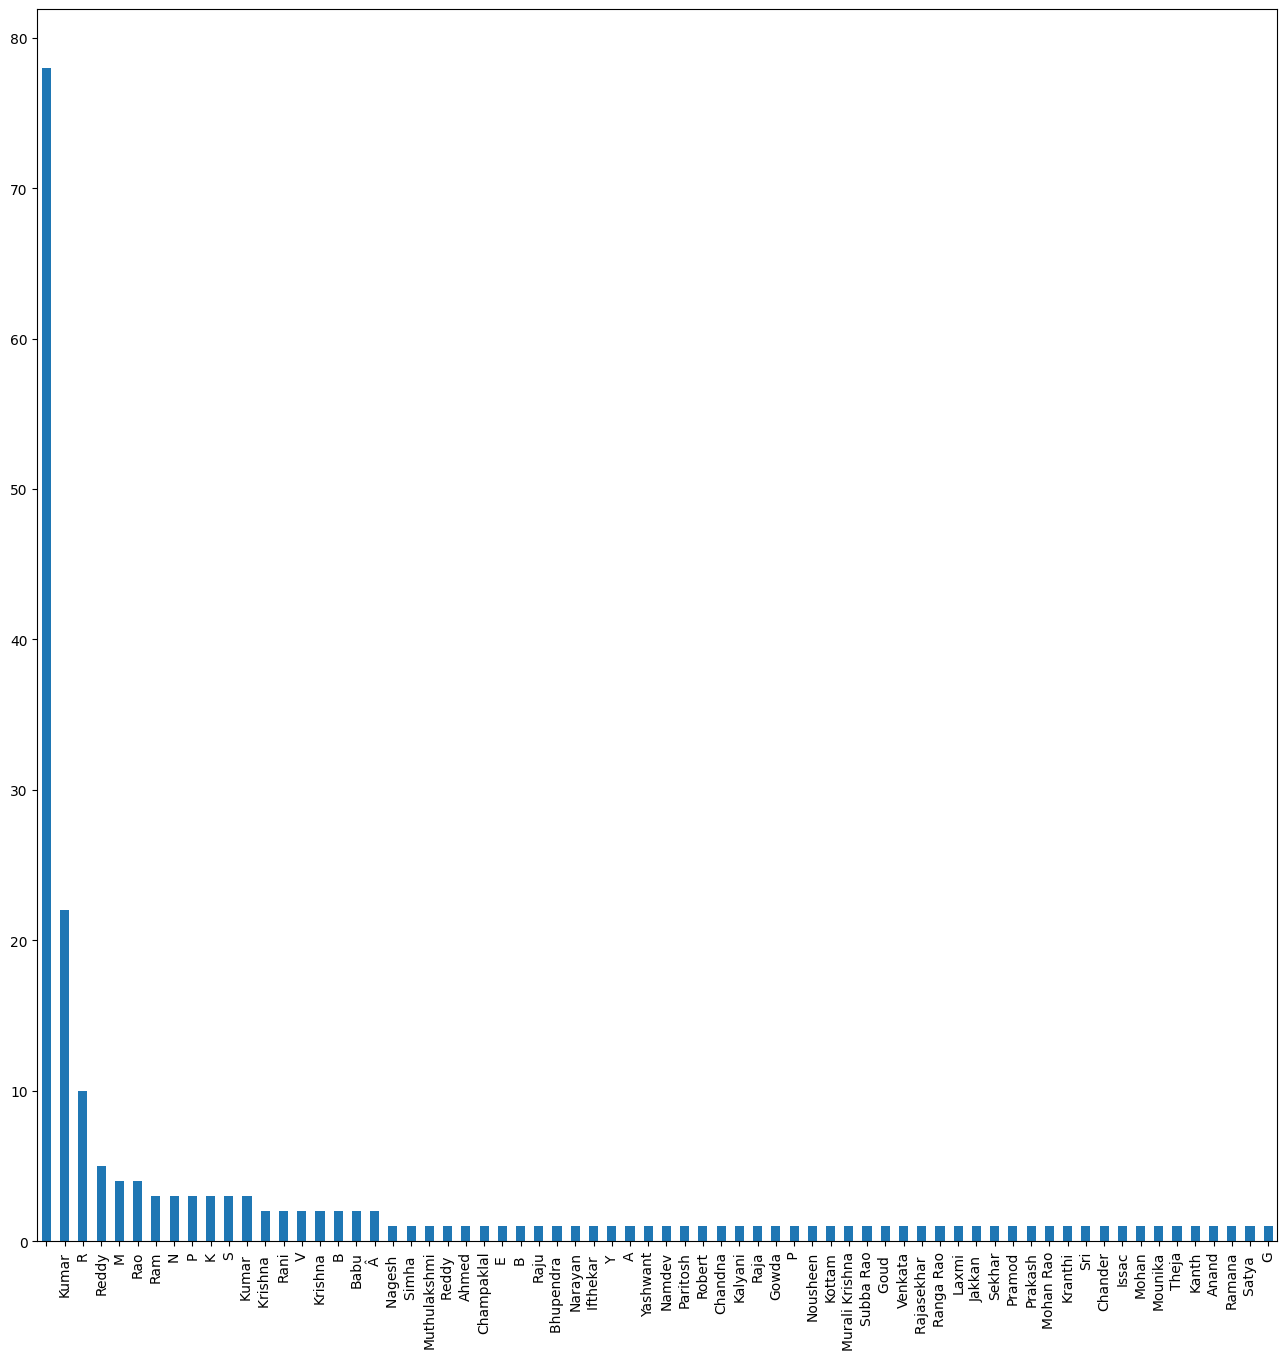

In [9]:
plt.figure(figsize=(16, 16))
df['middleName'].value_counts().plot.bar()

Kumar is the most common middle name we can observe here.

In [10]:
df[df['firstName'].isna() == False]

,firstName,middleName,lastName,name,baseCity
17,Divya,NaN,Kavuri,Apollo Clinic,Hyderabad
18,Shivam,NaN,P,Shivam hospitals,Hyderabad
19,Ranjan,NaN,Dey,Ranjan skin clinics,Hyderabad
20,Soumya,NaN,Sarkar,Soumya Multi speciality clinic,Hyderabad
21,Rishanku,NaN,Goyal,RKG Eye Center,Hyderabad
...,...,...,...,...,...
1731,Kushang,NaN,Mod,Shivam Children Hospital And Neonatal Care Centre,Ahmedabad
1732,Dhaval,NaN,Akhani,Childhood Hospital,Ahmedabad
1733,Keval Patel,NaN,Patel,Jk Dental Hospital Orthodontic & Implant Center,Ahmedabad
1734,Jinal Patel,NaN,Patel,Jk Dental Hospital Orthodontic & Implant Center,Ahmedabad


### I think, it will be safe to drop the middleName column, and we can proceed with the firstName only here.

In [11]:
df.drop('middleName', axis=1, inplace=True)

## Let's seggregate the data based on missing vs non-missing row values

In [12]:
df_not_missing = df.dropna()

In [13]:
df_not_missing.head()

,firstName,lastName,name,baseCity
17,Divya,Kavuri,Apollo Clinic,Hyderabad
18,Shivam,P,Shivam hospitals,Hyderabad
19,Ranjan,Dey,Ranjan skin clinics,Hyderabad
20,Soumya,Sarkar,Soumya Multi speciality clinic,Hyderabad
21,Rishanku,Goyal,RKG Eye Center,Hyderabad


In [14]:
df_not_missing.isna().sum()

firstName    0
lastName     0
name         0
baseCity     0
dtype: int64

In [15]:
df_not_missing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1715 entries, 17 to 1735
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   firstName  1715 non-null   object
 1   lastName   1715 non-null   object
 2   name       1715 non-null   object
 3   baseCity   1715 non-null   object
dtypes: object(4)
memory usage: 67.0+ KB


In [16]:
print(len(df_not_missing))

1715


In [17]:
len(df_not_missing)/len(df)

0.9879032258064516

In [18]:
df_not_missing['query'] = df_not_missing['firstName'].apply(lambda x:x.lower()) +"+" + df_not_missing['lastName'].apply(lambda x:x.lower()) \
                          +"+"+ df_not_missing['name'].apply(lambda x:x.lower()) + "+" + df_not_missing["baseCity"].apply(lambda x:x.lower())

/var/folders/z1/0tn2v83n6pzgl2m8lzz1phbc0000gn/T/ipykernel_78606/4047833984.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_not_missing['query'] = df_not_missing['firstName'].apply(lambda x:x.lower()) +"+" + df_not_missing['lastName'].apply(lambda x:x.lower()) \


In [19]:
df_not_missing['query']

17                   divya+kavuri+apollo clinic+hyderabad
18                    shivam+p+shivam hospitals+hyderabad
19               ranjan+dey+ranjan skin clinics+hyderabad
20      soumya+sarkar+soumya multi speciality clinic+h...
21                rishanku+goyal+rkg eye center+hyderabad
                              ...                        
1731    kushang+mod+shivam children hospital and neona...
1732           dhaval+akhani+childhood hospital+ahmedabad
1733    keval patel+patel+jk dental hospital orthodont...
1734    jinal patel+patel+jk dental hospital orthodont...
1735                   lavanya+yasam+sai clinic+hyderabad
Name: query, Length: 1715, dtype: object

## For missing data

In [20]:
import preprocess_kgptalkie as ps
import re

def get_clean(x):
    x = str(x).lower().replace('\\', '').replace('_', ' ')
    x = ps.cont_exp(x)
    x = ps.remove_emails(x)
    x = ps.remove_urls(x)
    x = ps.remove_html_tags(x)
    x = ps.remove_rt(x)
    x = ps.remove_accented_chars(x)
    x = ps.remove_special_chars(x)
    x = re.sub("(.)\\1{2,}", "\\1", x)
    return x




In [21]:
df_not_missing['query'] = df_not_missing['query'].apply(lambda x:ps.remove_accented_chars(x))
df_not_missing['query'].head()

/var/folders/z1/0tn2v83n6pzgl2m8lzz1phbc0000gn/T/ipykernel_78606/153722280.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_not_missing['query'] = df_not_missing['query'].apply(lambda x:ps.remove_accented_chars(x))


17                 divya+kavuri+apollo clinic+hyderabad
18                  shivam+p+shivam hospitals+hyderabad
19             ranjan+dey+ranjan skin clinics+hyderabad
20    soumya+sarkar+soumya multi speciality clinic+h...
21              rishanku+goyal+rkg eye center+hyderabad
Name: query, dtype: object

In [22]:
len(df_not_missing['query'].values)

1715

In [23]:
from collections import defaultdict

final_df = defaultdict(list)

In [24]:
df_not_missing = df_not_missing[['firstName', 'lastName', 'name', 'baseCity','query']]

In [25]:
# df_ch = df_not_missing[df_not_missing['baseCity'] == 'Chennai']
# df_ch.isna().sum()

In [26]:
def isDigit(char):
    pattern = "^[-+]?[0-9]*\.?[0-9]+(e[-+]?[0-9]+)?$"
    reg = re.compile(pattern)
    if reg.match(char):
        return True
    return False

In [27]:
from bs4 import BeautifulSoup
import urllib.request
import numpy as np

def extractReviews(df_not_missing):
    queries = df_not_missing['query'].values

    for i in tqdm(range(len(queries))):
        query = queries[i]
        query = "+".join(query.split(" "))
        url = 'https://google.com/search?q='+query
        print(url)

        request = urllib.request.Request(url)
        request.add_header('User-Agent', 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Safari/537.36')
        raw_response = urllib.request.urlopen(request).read()

        # Read the repsonse as a utf-8 string
        html = raw_response.decode("utf-8")

        soup = BeautifulSoup(html, 'html.parser')

        divs = soup.find_all("span", class_="Aq14fc")
        spans = soup.find_all("span", class_="hqzQac")
        practo_divs = soup.find_all("div", class_="fG8Fp uo4vr")

        if len(divs) > 0:
            for div, span, practo in zip(divs, spans, practo_divs):
                # Search for a h3 tag
                rating = div.get_text()
                greviews = span.get_text()
                prac = practo.get_text()
                print(greviews)
                greviews = [ps.remove_special_chars(i) for i in greviews.split(" ")]
                greviews = [i for i in greviews if isDigit(i)][0]
    #             print("Rating: ", rating, "Number of Reviews: ", greviews)
                final_df['firstName'].append(df_not_missing.iloc[i]['firstName'])
                final_df['lastName'].append(df_not_missing.iloc[i]['lastName'])
                final_df['clinicName'].append(df_not_missing.iloc[i]['name'])
                final_df['baseCity'].append(df_not_missing.iloc[i]['baseCity'])
    #             print(df_not_missing.iloc[i]['baseCity'])
                final_df['GoogleNRs'].append(float(greviews))
                final_df['practColumn'].append(prac)

                if rating is None:
                    print("Appending None!")
                    final_df['rating'].append("NA")
                else:
                    address = soup.find_all("span", class_="LrzXr")
    #                 print(df_not_missing.iloc[i]['baseCity'] in address[0].get_text())
    #                 print(address[0].get_text())
                    text = address[0].get_text()
                    text = ps.remove_accented_chars(text)
                    text = ps.remove_special_chars(text)
                    text = ps.remove_html_tags(text)

                    text = text.split(" ")
                    print(text)
                    print(text[-4:][:-1])
                    city = " ".join(text[-4:][:-1])

                    print("city: ", city)


                    final_df['extractedCity'].append(city)
                    if city == df_not_missing.iloc[i]['baseCity']:
                        print("Cities are matched!")
                        final_df['matched'].append(True)
                    else:
                        final_df['matched'].append(False)
                    final_df['rating'].append(rating)
                    
    return final_df

    #             print(div.get_text())


In [ ]:
final_df = extractReviews(df_not_missing)

  0%|                                                  | 0/1715 [00:00<?, ?it/s]

https://google.com/search?q=divya+kavuri+apollo+clinic+hyderabad


  0%|                                        | 1/1715 [00:02<1:04:49,  2.27s/it]

https://google.com/search?q=shivam+p+shivam+hospitals+hyderabad


  0%|                                        | 2/1715 [00:04<1:05:59,  2.31s/it]

https://google.com/search?q=ranjan+dey+ranjan+skin+clinics+hyderabad


  0%|                                        | 3/1715 [00:07<1:09:42,  2.44s/it]

176 Google reviews
['Shop', 'No', '1', 'Kaveri', 'Apartments', 'Ramghat', 'Rd', 'opposite', 'Meenakshi', 'Cinema', 'Sudhama', 'Puri', 'Aligarh', 'Uttar', 'Pradesh', '202001']
['Aligarh', 'Uttar', 'Pradesh']
city:  Aligarh Uttar Pradesh
https://google.com/search?q=soumya+sarkar+soumya+multi+speciality+clinic+hyderabad


  0%|                                        | 4/1715 [00:09<1:09:11,  2.43s/it]

https://google.com/search?q=rishanku+goyal+rkg+eye+center+hyderabad


  0%|                                        | 5/1715 [00:12<1:11:02,  2.49s/it]

179 Google reviews
['110', 'East', 'Patel', 'Nagar', 'Opposite', 'Metro', 'No', '176', 'Patel', 'Nagar', 'New', 'Delhi', 'Delhi', '110008']
['New', 'Delhi', 'Delhi']
city:  New Delhi Delhi
https://google.com/search?q=mamatha+r+mamatha+clinics+hyderabad


  0%|▏                                       | 6/1715 [00:14<1:12:26,  2.54s/it]

https://google.com/search?q=ravi+pallapolu+sai+keerthi+children+and+dental+clinic+hyderabad


  0%|▏                                       | 7/1715 [00:17<1:12:39,  2.55s/it]

https://google.com/search?q=b++ramesh+aditya+medical+complex+visakhapatnam


  0%|▏                                       | 8/1715 [00:19<1:07:19,  2.37s/it]

https://google.com/search?q=v+v++satya+sekhar+mamata+hospital+visakhapatnam


  1%|▏                                       | 9/1715 [00:22<1:10:07,  2.47s/it]

23 Google reviews
['behind', 'Srikanya', 'Theatre', 'Gandhinagar', 'Gajuwaka', 'Visakhapatnam', 'Andhra', 'Pradesh', '530026']
['Visakhapatnam', 'Andhra', 'Pradesh']
city:  Visakhapatnam Andhra Pradesh
https://google.com/search?q=v+ravi+chandra+sg+ortho+care+visakhapatnam


  1%|▏                                      | 10/1715 [00:24<1:13:20,  2.58s/it]

77 Google reviews
['SG', 'Ortho', 'Care', 'beside', 'Vijaya', 'Medical', 'Centre', 'Maharani', 'Peta', 'Visakhapatnam', 'Andhra', 'Pradesh', '530002']
['Visakhapatnam', 'Andhra', 'Pradesh']
city:  Visakhapatnam Andhra Pradesh
https://google.com/search?q=l+s++appala+naidu+visakha+multispeciality+clinics+visakhapatnam


  1%|▎                                      | 11/1715 [00:27<1:14:04,  2.61s/it]

https://google.com/search?q=v++chandra+sekharam+chandra+sekharam+clinic+visakhapatnam


  1%|▎                                      | 12/1715 [00:29<1:10:43,  2.49s/it]

3 Google reviews
['18130', 'Aditya', 'Medical', 'Complex', 'Opposite', 'KGH', 'OP', 'Gate', 'Maharani', 'Peta', 'Visakhapatnam', 'Andhra', 'Pradesh', '530002']
['Visakhapatnam', 'Andhra', 'Pradesh']
city:  Visakhapatnam Andhra Pradesh
https://google.com/search?q=sreeniavsa+rao+reddy+sri+srinivasa+gastro+&+liver+centre+visakhapatnam


  1%|▎                                      | 13/1715 [00:32<1:09:23,  2.45s/it]

https://google.com/search?q=j+k++vijay+kumar+urocare+visakhapatnam


  1%|▎                                      | 14/1715 [00:34<1:05:53,  2.32s/it]

11 Google reviews
['Collectorate', 'Junction', 'Maharanipeta', 'Opposite', 'Sagar', 'Lodge', 'Maharanipeta', 'Visakhapatnam', 'Andhra', 'Pradesh', '530002']
['Visakhapatnam', 'Andhra', 'Pradesh']
city:  Visakhapatnam Andhra Pradesh
https://google.com/search?q=chodisetti++subbarao+samudra+hospital+visakhapatnam


  1%|▎                                      | 15/1715 [00:36<1:05:13,  2.30s/it]

17 Google reviews
['105080', 'Waltair', 'Main', 'Rd', 'Ram', 'Nagar', 'Visakhapatnam', 'Andhra', 'Pradesh', '530002']
['Visakhapatnam', 'Andhra', 'Pradesh']
city:  Visakhapatnam Andhra Pradesh
https://google.com/search?q=b+s++kalyani+dr.+b.+s+kalyani+bharathi+hospital+visakhapatnam


  1%|▎                                      | 16/1715 [00:38<1:04:53,  2.29s/it]

56 Google reviews
['beside', 'Zilla', 'Parishad', 'Maharani', 'Peta', 'Visakhapatnam', 'Andhra', 'Pradesh', '530002']
['Visakhapatnam', 'Andhra', 'Pradesh']
city:  Visakhapatnam Andhra Pradesh
https://google.com/search?q=k++v+nageswar+rao+kotagiri+clinic+visakhapatnam


  1%|▍                                      | 17/1715 [00:40<1:03:39,  2.25s/it]

https://google.com/search?q=mohammed+akbar+gastro+&+liver+clinic+visakhapatnam


  1%|▍                                      | 18/1715 [00:43<1:03:38,  2.25s/it]

14 Google reviews
['206ARBT', 'Animishai', 'Pearl', '2ndFloorCollectors', 'Office', 'Junction', 'Junction', 'beside', 'Sagar', 'Lodge', 'Visakhapatnam', 'Andhra', 'Pradesh', '530002']
['Visakhapatnam', 'Andhra', 'Pradesh']
city:  Visakhapatnam Andhra Pradesh
https://google.com/search?q=sravani++sandhya+aura+skin+&+hair+clinic+visakhapatnam


  1%|▍                                      | 19/1715 [00:45<1:06:24,  2.35s/it]

https://google.com/search?q=komanapalli+sowjanya++padmaja+hospital+visakhapatnam


  1%|▍                                      | 20/1715 [00:48<1:07:41,  2.40s/it]

129 Google reviews
['71512', 'SRMT', 'Canteen', 'Rd', 'behind', '38', 'Bus', 'Stop', 'Chittinaidu', 'Colony', 'Old', 'Gajuwaka', 'Chaitanya', 'Nagar', 'Gajuwaka', 'Visakhapatnam', 'Andhra', 'Pradesh', '530026']
['Visakhapatnam', 'Andhra', 'Pradesh']
city:  Visakhapatnam Andhra Pradesh
https://google.com/search?q=a+meenakshi+sai+clinic+visakhapatnam


  1%|▍                                      | 21/1715 [00:50<1:05:22,  2.32s/it]

https://google.com/search?q=krishnam+penmatsa+onelife+clinic+visakhapatnam


  1%|▌                                      | 22/1715 [00:52<1:03:56,  2.27s/it]

https://google.com/search?q=j+n++srinivasulu+sri+chaitra+kidney+clinic+visakhapatnam


  1%|▌                                      | 23/1715 [00:54<1:05:07,  2.31s/it]

9 Google reviews
['Ushodaya', 'Chamber', 'Collectorate', 'Junction', 'opp', 'sagar', 'lodge', 'Visakhapatnam', 'Andhra', 'Pradesh', '530002']
['Visakhapatnam', 'Andhra', 'Pradesh']
city:  Visakhapatnam Andhra Pradesh
https://google.com/search?q=monitha+narendrula+eeshritha+skin+&+hair+institute++hyderabad


  1%|▌                                      | 24/1715 [00:57<1:05:53,  2.34s/it]

https://google.com/search?q=mona+deva+apollo+sugar+clinic+hyderabad


  1%|▌                                      | 25/1715 [01:00<1:16:11,  2.71s/it]

https://google.com/search?q=shehzad+ruman+dr.shehzad+endocrine+&+diabetes+clinic+hyderabad


  2%|▌                                      | 26/1715 [01:02<1:11:09,  2.53s/it]

https://google.com/search?q=mushtaq+quadri+first+health+diagnostics+and+clinics+hyderabad


  2%|▌                                      | 27/1715 [01:05<1:10:18,  2.50s/it]

54 Google reviews
['Archies', 'Building', '1st', 'FloorBeside', 'Sydicate', 'BankAttapur', 'Utkoor', 'Mogdumpur', 'Rd', 'Opposite', 'Pillar', 'No180', 'Hyderabad', 'Telangana', '500048']
['No180', 'Hyderabad', 'Telangana']
city:  No180 Hyderabad Telangana
https://google.com/search?q=fiazullah+khan+integro+hospital+hyderabad


  2%|▋                                      | 28/1715 [01:07<1:09:20,  2.47s/it]

77 Google reviews
['1227252', 'INTEGRO', 'HOSPITAL', 'P', 'T', 'COOP', 'HOUSING', 'SOCIETY', 'Rethibowli', 'Hyderabad', 'Telangana', '500008']
['Rethibowli', 'Hyderabad', 'Telangana']
city:  Rethibowli Hyderabad Telangana
https://google.com/search?q=mohammed+asif+sameer+cardiac+care+hyderabad


  2%|▋                                      | 29/1715 [01:11<1:19:12,  2.82s/it]

https://google.com/search?q=kollipara++haritha+radha's+derma+care+visakhapatnam


  2%|▋                                      | 30/1715 [01:14<1:19:35,  2.83s/it]

33 Google reviews
['103', 'Siripuram', 'Fort', 'Siripuram', 'Visakhapatnam', 'Andhra', 'Pradesh', '530003']
['Visakhapatnam', 'Andhra', 'Pradesh']
city:  Visakhapatnam Andhra Pradesh
https://google.com/search?q=shilpa+bharatgiri+raghava+polyclinic+hyderabad


  2%|▋                                      | 31/1715 [01:16<1:15:01,  2.67s/it]

3 Google reviews
['CCCW49J', 'Rd', 'Number', '4', 'Zahara', 'Nagar', 'Banjara', 'Hills', 'Hyderabad', 'Telangana', '500034']
['Hills', 'Hyderabad', 'Telangana']
city:  Hills Hyderabad Telangana
https://google.com/search?q=sujitkumar+vakatir+orthopaedic+&+sports+injury+clinic+hyderabad


  2%|▋                                      | 32/1715 [01:18<1:11:45,  2.56s/it]

https://google.com/search?q=divyaswetha+narasapuram+sai+medha+speciality+clinics+hyderabad


  2%|▊                                      | 33/1715 [01:21<1:10:18,  2.51s/it]

81 Google reviews
['Flat', 'NoG8', 'SERENE', 'VIEW', 'Apartment', 'Complex', 'Rd', 'Number', '12', 'Madhavapuri', 'Hills', 'Chanda', 'Nagar', 'Telangana', '502032']
['Chanda', 'Nagar', 'Telangana']
city:  Chanda Nagar Telangana
https://google.com/search?q=alekya+singapore+the+skin+sense+hyderabad


  2%|▊                                      | 34/1715 [01:24<1:12:08,  2.58s/it]

241 Google reviews
['202', 'Bhavyas', 'Fantastika', 'Road', 'No', '12', 'Anand', 'Banjara', 'Colony', 'Banjara', 'Hills', 'Hyderabad', 'Telangana', '500034']
['Hills', 'Hyderabad', 'Telangana']
city:  Hills Hyderabad Telangana
https://google.com/search?q=suneetha++reddy+e+birthcare+hospital+hyderabad


  2%|▊                                      | 35/1715 [01:26<1:09:20,  2.48s/it]

154 Google reviews
['22647182A64', 'Street', '1', 'Shivam', 'Rd', 'behind', 'Bakers', 'Q', 'bakery', 'Sharada', 'Nagar', 'Bagh', 'Amberpet', 'Amberpet', 'Hyderabad', 'Telangana', '500013']
['Amberpet', 'Hyderabad', 'Telangana']
city:  Amberpet Hyderabad Telangana
https://google.com/search?q=naveen+kumar+magna+code+clinic+hyderabad


  2%|▊                                      | 36/1715 [01:28<1:10:55,  2.53s/it]

101 Google reviews
['MAG', 'POLY', 'CLINICS', 'Naman', 'Towers', 'Servi', 'Nivas', 'H', 'no', '114B', 'Survey', 'number', '194', '2nd', 'floor', 'Manikonda', 'marrichettu', 'Telangana', '500089']
['Manikonda', 'marrichettu', 'Telangana']
city:  Manikonda marrichettu Telangana
https://google.com/search?q=hariram+vuppaladadhiam+hari's+heart+clinic.+dr+v+hariram+hyderabad


  2%|▊                                      | 37/1715 [01:31<1:08:27,  2.45s/it]

22 Google reviews
['First', 'floor', 'MIG', '321REMEDY', 'HOSPITAL', 'ROAD', 'Kukatpally', 'Housing', 'Board', 'Colony', 'Kukatpally', 'Hyderabad', 'Telangana', '500072']
['Kukatpally', 'Hyderabad', 'Telangana']
city:  Kukatpally Hyderabad Telangana
https://google.com/search?q=ramesh+raju+sneha+clinic+hyderabad


  2%|▊                                      | 38/1715 [01:33<1:08:46,  2.46s/it]

96 Google reviews
['Mig', '152', 'Above', 'Axis', 'Bank', 'Ist', 'floor', 'road', 'no', '1', 'KPHB', 'Hyderabad', 'Telangana', '500085']
['KPHB', 'Hyderabad', 'Telangana']
city:  KPHB Hyderabad Telangana
https://google.com/search?q=venkata++arella+sri+sai+kalpana+clinic+hyderabad


  2%|▉                                      | 39/1715 [01:35<1:06:55,  2.40s/it]

https://google.com/search?q=madhavi+aurangabadkar+skin+&+laser+clinic+hyderabad


  2%|▉                                      | 40/1715 [01:38<1:07:49,  2.43s/it]

159 Google reviews
['43323', 'Bank', 'St', 'near', 'Hotel', 'Sitaara', 'Sultan', 'Bazar', 'Koti', 'Hyderabad', 'Telangana', '500095']
['Koti', 'Hyderabad', 'Telangana']
city:  Koti Hyderabad Telangana
https://google.com/search?q=raghunath+babu+diabaid+diabetes+center+hyderabad


  2%|▉                                      | 41/1715 [01:41<1:09:25,  2.49s/it]

https://google.com/search?q=saketh+k+gk+polyclinic+hyderabad


  2%|▉                                      | 42/1715 [01:43<1:10:42,  2.54s/it]

https://google.com/search?q=samata+tulla+medihub+clinics+hyderabad


  3%|▉                                      | 43/1715 [01:45<1:07:45,  2.43s/it]

https://google.com/search?q=janaki+ram+reddy+sree+srinivasa+ent+center+hyderabad


  3%|█                                      | 44/1715 [01:48<1:09:16,  2.49s/it]

20 Google reviews
['63347172', 'Dwarakapuri', 'Colony', 'Road', 'beside', 'corporation', 'bank', 'Punjagutta', 'Hyderabad', 'Telangana', '500082']
['Punjagutta', 'Hyderabad', 'Telangana']
city:  Punjagutta Hyderabad Telangana
https://google.com/search?q=manogna++vellala+mano's+skin+&+hair+clinic+hyderabad


  3%|█                                      | 45/1715 [01:51<1:14:38,  2.68s/it]

https://google.com/search?q=amishrita++chintawar++manasa+hospital+hyderabad


  3%|█                                      | 46/1715 [01:54<1:14:03,  2.66s/it]

254 Google reviews
['Adjcent', 'public', 'school', 'Lane', 'Number', '6', 'Sai', 'Chitra', 'Nagar', 'Ramanthapur', 'Hyderabad', 'Telangana', '500013']
['Ramanthapur', 'Hyderabad', 'Telangana']
city:  Ramanthapur Hyderabad Telangana
https://google.com/search?q=neelima+potluri+v+viva+skin+clinic+hyderabad


  3%|█                                      | 47/1715 [01:56<1:10:28,  2.54s/it]

52 Google reviews
['Aditya', 'Ram', 'Square', '82283A646A', '1st', 'floor', 'Rd', 'Number', '36', 'Jubilee', 'Hills', 'Hyderabad', 'Telangana', '500033']
['Hills', 'Hyderabad', 'Telangana']
city:  Hills Hyderabad Telangana
https://google.com/search?q=swapna++priya+cosmosure+clinic+hyderabad


  3%|█                                      | 48/1715 [01:59<1:11:34,  2.58s/it]

154 Google reviews
['Maxcure', 'lane', '4th', 'Floor', 'SBR', 'Gateway', 'Opp', 'Cyber', 'Gate', 'Way', 'Hitech', 'City', 'Main', 'Rd', 'Hyderabad', 'Telangana', '500081']
['Rd', 'Hyderabad', 'Telangana']
city:  Rd Hyderabad Telangana
https://google.com/search?q=babitha+++++++++maturi+parijatham+women+wellness+clinics+hyderabad


  3%|█                                      | 49/1715 [02:01<1:08:10,  2.46s/it]

https://google.com/search?q=sudha+shroff+dermdent+skin&dental+clinic+hyderabad


  3%|█▏                                     | 50/1715 [02:03<1:06:37,  2.40s/it]

https://google.com/search?q=suryaprakash+hedda+hedda+clinic+hyderabad


  3%|█▏                                     | 51/1715 [02:05<1:06:25,  2.39s/it]

33 Google reviews
['Czech', 'Colony', 'Sanath', 'Nagar', 'Hyderabad', 'Telangana', '500018']
['Nagar', 'Hyderabad', 'Telangana']
city:  Nagar Hyderabad Telangana
https://google.com/search?q=srikant+jawalkar+the+shoulder+centre+hyderabad


  3%|█▏                                     | 52/1715 [02:08<1:07:44,  2.44s/it]

31 Google reviews
['Between', 'Ohris', 'Banjara', 'and', 'petrol', 'pump', 'Mayfair', 'Garden', 'at', 'The', 'Shoulder', 'centre', 'G1A', 'Road', 'No', '12', 'Banjara', 'Hills', 'Hyderabad', 'Telangana', '500034']
['Hills', 'Hyderabad', 'Telangana']
city:  Hills Hyderabad Telangana
https://google.com/search?q=suraj+uppalapati+gastro+360+clinics+hyderabad


  3%|█▏                                     | 53/1715 [02:11<1:07:53,  2.45s/it]

144 Google reviews
['2nd', 'floor', 'Harsha', 'Pride', 'Plot', 'no', '34', 'A', '45', 'A', 'Sriram', 'Nagar', 'Above', 'KS', 'Bakers', 'Botanical', 'garden', 'road', 'Kondapur', 'near', 'Sarath', 'City', 'Capital', 'Mall', 'Hyderabad', 'Telangana', '500084']
['Mall', 'Hyderabad', 'Telangana']
city:  Mall Hyderabad Telangana
https://google.com/search?q=sivani+payneni+vito+specialty+clinic+hyderabad


  3%|█▏                                     | 54/1715 [02:13<1:05:51,  2.38s/it]

37 Google reviews
['2F', 'Plot', '1492', 'Seshadri', 'Marg', 'Raghavendra', 'Colony', 'Kondapur', 'Telangana', '500084']
['Colony', 'Kondapur', 'Telangana']
city:  Colony Kondapur Telangana
https://google.com/search?q=saikiran+thipparthi+vito+specialty+clinics+hyderabad


  3%|█▎                                     | 55/1715 [02:15<1:03:51,  2.31s/it]

https://google.com/search?q=venkateswara++abburu+siri+children's+clinic+hyderabad


  3%|█▎                                     | 56/1715 [02:17<1:03:42,  2.30s/it]

https://google.com/search?q=gokul+mandala+drgokulreddy+hyderabad


  3%|█▎                                     | 57/1715 [02:19<1:03:25,  2.30s/it]

3 Google reviews
['Apollo', 'Health', 'Street', 'City', 'Rd', 'Number', '72', 'opp', 'Bharatiya', 'Vidya', 'Bhavan', 'School', 'Prashasan', 'Nagar', 'Film', 'Nagar', 'Hyderabad', 'Telangana', '500033']
['Nagar', 'Hyderabad', 'Telangana']
city:  Nagar Hyderabad Telangana
https://google.com/search?q=naresh+kanukunta++shreshta+sugar,thyroid+and+general+clinic++hyderabad


  3%|█▎                                     | 58/1715 [02:22<1:02:07,  2.25s/it]

https://google.com/search?q=mukesh+khetan+khetan+children's+clinic+hyderabad


  3%|█▎                                     | 59/1715 [02:24<1:04:12,  2.33s/it]

118 Google reviews
['91364B103', 'Bapu', 'Ghat', 'Bapu', 'Nagar', 'Langar', 'Houz', 'Hyderabad', 'Telangana', '500008']
['Houz', 'Hyderabad', 'Telangana']
city:  Houz Hyderabad Telangana
https://google.com/search?q=nitin+rai+vohra+vohra+e.n.t+care+centre+hyderabad


  3%|█▎                                     | 60/1715 [02:27<1:06:57,  2.43s/it]

79 Google reviews
['2350438', 'Govindula', 'Complex', 'Main', 'Road', 'Amberpet', 'near', 'Irani', 'Hotel', 'Bus', 'Stop', 'Hyderabad', 'Telangana', '500013']
['Stop', 'Hyderabad', 'Telangana']
city:  Stop Hyderabad Telangana
https://google.com/search?q=chandrasekhar+reddy+lavie+clinic+hyderabad


  4%|█▍                                     | 61/1715 [02:29<1:05:48,  2.39s/it]

10 Google reviews
['Prime', 'Plaza', 'Yousufguda', 'Main', 'Rd', 'near', 'to', 'Signal', 'Sri', 'Krishna', 'Nagar', 'Yousufguda', 'Hyderabad', 'Telangana', '500045']
['Yousufguda', 'Hyderabad', 'Telangana']
city:  Yousufguda Hyderabad Telangana
https://google.com/search?q=rafi+md+kids+care+the+childrens+hospital+hyderabad


  4%|█▍                                     | 62/1715 [02:31<1:05:10,  2.37s/it]

https://google.com/search?q=satish++reddy+sai+sohan+childrens+clinic+hyderabad


  4%|█▍                                     | 63/1715 [02:34<1:04:22,  2.34s/it]

17 Google reviews
['1', '111244', 'NH65', 'Kalapuram', 'Basti', 'Miyapur', 'Telangana', '500049']
['Basti', 'Miyapur', 'Telangana']
city:  Basti Miyapur Telangana
https://google.com/search?q=uday+goutam+goutam+neuro+care+hyderabad


  4%|█▍                                     | 64/1715 [02:36<1:06:52,  2.43s/it]

135 Google reviews
['HNo261', 'MIG', 'Road', 'No', '4', 'Kukatpally', 'Housing', 'Board', 'Colony', 'Kukatpally', 'Hyderabad', 'Telangana', '500072']
['Kukatpally', 'Hyderabad', 'Telangana']
city:  Kukatpally Hyderabad Telangana
https://google.com/search?q=mohammed+anfas+shine+specialty+clinics+hyderabad


  4%|█▍                                     | 65/1715 [02:39<1:07:07,  2.44s/it]

22 Google reviews
['Lakshmi', 'Nagar', 'Colony', 'Film', 'Nagar', 'Hyderabad', 'Telangana', '500008']
['Nagar', 'Hyderabad', 'Telangana']
city:  Nagar Hyderabad Telangana
https://google.com/search?q=navaneeth+raj+dr+romanas+hyderabad


  4%|█▌                                     | 66/1715 [02:41<1:08:44,  2.50s/it]

https://google.com/search?q=raghuveer+reddy+sai+institute+of+sports+injury+&+arthroscopy+hyderabad


  4%|█▌                                     | 67/1715 [02:44<1:11:18,  2.60s/it]

239 Google reviews
['63252B8', 'Lane', 'Opp', 'More', 'Mega', 'Store', 'Erramanzil', 'Colony', 'Rd', 'Eramanzil', 'Punjagutta', 'Hyderabad', 'Telangana', '500004']
['Punjagutta', 'Hyderabad', 'Telangana']
city:  Punjagutta Hyderabad Telangana
https://google.com/search?q=deepti+bandaru+pranada+childrens+clinic+hyderabad


  4%|█▌                                     | 68/1715 [02:47<1:09:12,  2.52s/it]

https://google.com/search?q=satish+andani+andani+hospital+for+women+&+children+hyderabad


  4%|█▌                                     | 69/1715 [02:49<1:08:05,  2.48s/it]

150 Google reviews
['Narsingi', 'Heights', 'Opposite', 'Syndicate', 'Bank', 'beside', 'S', 'R', 'Model', 'School', 'Narsinigi', 'Telangana', '500089']
['School', 'Narsinigi', 'Telangana']
city:  School Narsinigi Telangana
https://google.com/search?q=lakkireddi+prabhat+regenio+lakki+scope+orthopaedics+hyderabad


  4%|█▌                                     | 70/1715 [02:51<1:05:14,  2.38s/it]

https://google.com/search?q=alluri+neeraja+goutam+neuro+care+hyderabad


  4%|█▌                                     | 71/1715 [02:54<1:06:11,  2.42s/it]

135 Google reviews
['HNo261', 'MIG', 'Road', 'No', '4', 'Kukatpally', 'Housing', 'Board', 'Colony', 'Kukatpally', 'Hyderabad', 'Telangana', '500072']
['Kukatpally', 'Hyderabad', 'Telangana']
city:  Kukatpally Hyderabad Telangana
https://google.com/search?q=swetha+v+v+swethas+skin+&+cosmetology+clinic+hyderabad


  4%|█▋                                     | 72/1715 [02:56<1:05:54,  2.41s/it]

8 Google reviews
['Shop', 'No3SR', 'TOWERSREMEDEY', 'HOSPITAL', 'LANE', 'Road', 'No', '4', 'Kukatpally', 'Housing', 'Board', 'Colony', 'Hyderabad', 'Telangana', '500072']
['Colony', 'Hyderabad', 'Telangana']
city:  Colony Hyderabad Telangana
https://google.com/search?q=praneeth+moka+olive+diagnostics+hyderabad


  4%|█▋                                     | 73/1715 [02:59<1:08:12,  2.49s/it]

119 Google reviews
['3rd', 'Floor', 'Yogeshwara', 'Complex', 'Madeenaguda', 'Telangana', '500049']
['Complex', 'Madeenaguda', 'Telangana']
city:  Complex Madeenaguda Telangana
https://google.com/search?q=manohar++n+n+m+reddy+skin+and+hair+clinic+hyderabad


  4%|█▋                                     | 74/1715 [03:01<1:07:37,  2.47s/it]

23 Google reviews
['Backside', 'of', 'Vijetha', 'Supermarket', '3', 'Manjeera', 'Pipeline', 'Rd', 'beside', 'Dr', 'Chenna', 'Reddy', 'Hospital', 'Indira', 'Nagar', 'Chanda', 'Nagar', 'Hyderabad', 'Telangana', '500050']
['Nagar', 'Hyderabad', 'Telangana']
city:  Nagar Hyderabad Telangana
https://google.com/search?q=indira+pavan+omega+clinics+hyderabad


  4%|█▋                                     | 75/1715 [03:04<1:08:12,  2.50s/it]

351 Google reviews
['Divija', 'Enclave', 'Street', 'No3', 'Western', 'HillsAddagutta', 'Society', 'Opp', 'JNTU', 'KPHB', 'Kukatpally', 'Hyderabad', 'Telangana', '500085']
['Kukatpally', 'Hyderabad', 'Telangana']
city:  Kukatpally Hyderabad Telangana
https://google.com/search?q=boddepalli+srinivasarao+srinivasa+clinic+visakhapatnam


  4%|█▋                                     | 76/1715 [03:06<1:05:03,  2.38s/it]

https://google.com/search?q=gopi+palli+deepthi+nursing+home+visakhapatnam


  4%|█▊                                     | 77/1715 [03:08<1:02:04,  2.27s/it]

https://google.com/search?q=jayini+p+rammohen+jayini+multi-speciality+clinics+hyderabad


  5%|█▊                                     | 78/1715 [03:10<1:04:06,  2.35s/it]

507 Google reviews
['5th', 'Floor', 'Above', 'Sachdev', 'Sports', 'Sri', 'Tirumalas', 'Subash', 'Arcade', 'HNo1621', 'Kondapur', 'Kothaguda', 'X', 'Roads', 'Hyderabad', 'Telangana', '500084']
['Roads', 'Hyderabad', 'Telangana']
city:  Roads Hyderabad Telangana
https://google.com/search?q=sriharsha++talabhaktula+alyve+skin+clinic+visakhapatnam


  5%|█▊                                     | 79/1715 [03:13<1:04:53,  2.38s/it]

https://google.com/search?q=t+vijay+kumar+shree+sharan+poly+clinic+visakhapatnam


  5%|█▊                                     | 80/1715 [03:15<1:00:16,  2.21s/it]

https://google.com/search?q=b++rajendraprasad+sri+gayatri+clinic+visakhapatnam


  5%|█▊                                     | 81/1715 [03:19<1:14:49,  2.75s/it]

12 Google reviews
['715', 'Bakkanapalem', 'Rd', 'Junction', 'Madhurawada', 'Visakhapatnam', 'Andhra', 'Pradesh', '530041']
['Visakhapatnam', 'Andhra', 'Pradesh']
city:  Visakhapatnam Andhra Pradesh
https://google.com/search?q=p+kamakshi+sri+gayatri+clinic+visakhapatnam


  5%|█▊                                     | 82/1715 [03:22<1:23:26,  3.07s/it]

https://google.com/search?q=r++krishna++krishna+clinic+visakhapatnam


  5%|█▉                                     | 83/1715 [03:25<1:16:23,  2.81s/it]

https://google.com/search?q=kvn+prasad+sri+rama+clinic+visakhapatnam


  5%|█▉                                     | 84/1715 [03:27<1:10:50,  2.61s/it]

https://google.com/search?q=a+lakshmi+manasi+sri+krishna+multispeciality+clinics+visakhapatnam


  5%|█▉                                     | 85/1715 [03:29<1:11:15,  2.62s/it]

27 Google reviews
['Srinivasa', 'nilayam', 'D', 'No', '5511836', 'JR', 'Layout', 'S', 'V', 'S', 'New', 'Venkojipalem', 'Visakhapatnam', 'Andhra', 'Pradesh', '530022']
['Visakhapatnam', 'Andhra', 'Pradesh']
city:  Visakhapatnam Andhra Pradesh
https://google.com/search?q=venkata+vaddiraju+visakhakneeclinic+visakhapatnam


  5%|█▉                                     | 86/1715 [03:32<1:12:23,  2.67s/it]

https://google.com/search?q=g+manohar+gayatri+doctors+care+visakhapatnam


  5%|█▉                                     | 87/1715 [03:36<1:22:56,  3.06s/it]

7 Google reviews
['8315', 'Opp', 'Surya', 'Kiran', 'Apartments', 'Andhra', 'Medical', 'College', 'Pedda', 'Waltair', 'Visakhapatnam', 'Andhra', 'Pradesh', '530017']
['Visakhapatnam', 'Andhra', 'Pradesh']
city:  Visakhapatnam Andhra Pradesh
https://google.com/search?q=m+madhusudhana+babu+somanath+enclave+visakhapatnam


  5%|██                                     | 88/1715 [03:40<1:30:56,  3.35s/it]

4 Google reviews
['Apollo', 'Hospitals', 'Health', 'City', 'Arilova', 'Vizag', 'Srl', 'No78P', '76', 'Chinnadagili', 'Arilova', 'Visakhapatnam', 'Andhra', 'Pradesh', '530040']
['Visakhapatnam', 'Andhra', 'Pradesh']
city:  Visakhapatnam Andhra Pradesh
https://google.com/search?q=naveen+kumar++madigani+dr.+naveen's+advanced+skin,+cosmetology,+laser+&+hair+transplantation+clinic++visakhapatnam


  5%|██                                     | 89/1715 [03:43<1:26:01,  3.17s/it]

33 Google reviews
['Plot', 'no308', 'Near', 'Punjab', 'National', 'Bank', 'Rd', 'Sector', '3A', 'Block', 'B', 'Sector', '3', 'Vaishali', 'Ghaziabad', 'Uttar', 'Pradesh', '201014']
['Ghaziabad', 'Uttar', 'Pradesh']
city:  Ghaziabad Uttar Pradesh
https://google.com/search?q=b+bhaskarrao+doctor's+enclave+visakhapatnam


  5%|██                                     | 90/1715 [03:46<1:21:41,  3.02s/it]

https://google.com/search?q=anup+gundu+blossoms+skin+and+hair+clinic+hyderabad


  5%|██                                     | 91/1715 [03:50<1:31:50,  3.39s/it]

17 Google reviews
['Dharmareddy', 'Phase2', 'Hydernagar', 'Balaji', 'Nagar', 'Main', 'Rd', 'Kukatpally', 'Hyderabad', 'Telangana', '500072']
['Kukatpally', 'Hyderabad', 'Telangana']
city:  Kukatpally Hyderabad Telangana
https://google.com/search?q=venkata++p++dr.+pvk+health+care+poly+clinic+and+diagnostics+hyderabad


  5%|██                                     | 92/1715 [03:52<1:24:18,  3.12s/it]

6 Google reviews
['8G4GRX3', 'Unnamed', 'Road', 'Shirdi', 'Enclave', 'Balapur', 'Badangpet', 'Hyderabad', 'Telangana', '500069']
['Badangpet', 'Hyderabad', 'Telangana']
city:  Badangpet Hyderabad Telangana
https://google.com/search?q=pavan+kumar++k+omega+clinics+hyderabad


  5%|██                                     | 93/1715 [03:55<1:18:11,  2.89s/it]

https://google.com/search?q=vidya+m+kavya+narsing+home+hyderabad


  5%|██▏                                    | 94/1715 [03:58<1:19:27,  2.94s/it]

164 Google reviews
['22', '254', 'beside', 'sbi', 'bank', 'lane', 'ASRaju', 'Nagar', 'Vivekananda', 'Nagar', 'Kukatpally', 'Hyderabad', 'Telangana', '500072']
['Kukatpally', 'Hyderabad', 'Telangana']
city:  Kukatpally Hyderabad Telangana
https://google.com/search?q=aruna+k+shree+vaishnavi+childrens+clinic+hyderabad


  6%|██▏                                    | 95/1715 [04:02<1:28:17,  3.27s/it]

7 Google reviews
['G9QVRFJ', 'Pragathi', 'Nagar', 'ALEAP', 'Industrial', 'Area', 'Near', 'Pragathi', 'Nagar', 'Kamaan', 'Miyapur', 'Rd', 'Hyderabad', 'Telangana', '500090']
['Rd', 'Hyderabad', 'Telangana']
city:  Rd Hyderabad Telangana
https://google.com/search?q=jhansi+k+sri+bhargavi+hospital+hyderabad


  6%|██▏                                    | 96/1715 [04:06<1:34:33,  3.50s/it]

47 Google reviews
['Plo', 'No170', 'Kalyan', 'Nagar', 'Phase', '3', 'Road', 'Kalyan', 'Nagar', 'Hyderabad', 'Telangana', '500045']
['Nagar', 'Hyderabad', 'Telangana']
city:  Nagar Hyderabad Telangana
https://google.com/search?q=i+chandrasekhar+harshitha+hospital+visakhapatnam


  6%|██▏                                    | 97/1715 [04:10<1:38:49,  3.66s/it]

43 Google reviews
['GNT', 'Road', 'New', 'Gajuwaka', 'Main', 'Road', 'New', 'Gajuwaka', 'Photo', 'Studio', 'Gajuwaka', 'Visakhapatnam', 'Andhra', 'Pradesh', '530026']
['Visakhapatnam', 'Andhra', 'Pradesh']
city:  Visakhapatnam Andhra Pradesh
https://google.com/search?q=av+mohanrao+samudra+hospital+visakhapatnam


  6%|██▏                                    | 98/1715 [04:13<1:35:48,  3.56s/it]

23 Google reviews
['Raksha', 'Plaza', 'KGH', 'Down', 'Rd', 'Near', 'KGH', 'Down', 'Road', 'Jagadamba', 'Junction', 'Visakhapatnam', 'Andhra', 'Pradesh', '530002']
['Visakhapatnam', 'Andhra', 'Pradesh']
city:  Visakhapatnam Andhra Pradesh
https://google.com/search?q=ranga+rao+m+v+kavya+nursing+home+hyderabad


  6%|██▎                                    | 99/1715 [04:15<1:25:08,  3.16s/it]

https://google.com/search?q=mithun+d+ashmita+ortho+spine+care+hyderabad


  6%|██▏                                   | 100/1715 [04:19<1:32:03,  3.42s/it]

114 Google reviews
['261', 'shop', 'no', '12', 'opp', 'Vijetha', 'supermarket', 'Main', 'road', 'behind', 'Lotus', 'pharmacy', 'Chanda', 'Nagar', 'Telangana', '500050']
['Chanda', 'Nagar', 'Telangana']
city:  Chanda Nagar Telangana
https://google.com/search?q=varun+bogadi+nithya+gastro+and+liver+clinic++hyderabad


  6%|██▏                                   | 101/1715 [04:24<1:37:28,  3.62s/it]

https://google.com/search?q=shobha++p+maruthu+hospital+hyderabad


  6%|██▎                                   | 102/1715 [04:28<1:40:49,  3.75s/it]

https://google.com/search?q=ajay++paruchuri+ajay+orthopaedic+clinic+hyderabad


  6%|██▎                                   | 103/1715 [04:32<1:43:20,  3.85s/it]

40 Google reviews
['4th', 'Rd', 'MIG251', '4th', 'Rd', 'K', 'P', 'H', 'B', 'Phase', '1', 'Kukatpally', 'Hyderabad', 'Telangana', '500072']
['Kukatpally', 'Hyderabad', 'Telangana']
city:  Kukatpally Hyderabad Telangana
https://google.com/search?q=k+venkatachalam+sri+gayatri+skin+care+visakhapatnam


  6%|██▎                                   | 104/1715 [04:34<1:33:57,  3.50s/it]

74 Google reviews
['2nd', 'Floor', 'Satya', 'Sridevi', 'Enclave', 'III', 'Lane', 'Seethammapeta', 'Road', 'Opposite', 'Harsha', 'Labs', 'Dwaraka', 'Nagar', 'Visakhapatnam', 'Andhra', 'Pradesh', '530016']
['Visakhapatnam', 'Andhra', 'Pradesh']
city:  Visakhapatnam Andhra Pradesh
https://google.com/search?q=chandra+v+tanishka+clinic+hyderabad


  6%|██▎                                   | 105/1715 [04:37<1:25:14,  3.18s/it]

40 Google reviews
['plot', 'no76croad', 'no3HP', 'GAS', 'AGENCY', 'LINEADDAGUTTA', 'SOCIETYOPPJNTU', 'Kukatpally', 'Hyderabad', 'Telangana', '500072']
['Kukatpally', 'Hyderabad', 'Telangana']
city:  Kukatpally Hyderabad Telangana
https://google.com/search?q=kavitha+khola+sai+arogya+pharmacy+hyderabad


  6%|██▎                                   | 106/1715 [04:41<1:32:47,  3.46s/it]

1 Google review
['Shop', 'no7', 'csc4', 'Pocket', '5', 'Sector', '5', 'Rohini', 'Delhi', '110085']
['5', 'Rohini', 'Delhi']
city:  5 Rohini Delhi
https://google.com/search?q=prabhat+kiran+reddy+k+prabhath+medical+center+hyderabad


  6%|██▎                                   | 107/1715 [04:44<1:26:12,  3.22s/it]

71 Google reviews
['CC76XVX', 'Film', 'Nagar', 'Hyderabad', 'Telangana', '500096']
['Nagar', 'Hyderabad', 'Telangana']
city:  Nagar Hyderabad Telangana
https://google.com/search?q=swathi+c+ramdev+rao+hospital,house++hyderabad


  6%|██▍                                   | 108/1715 [04:48<1:35:53,  3.58s/it]

445 Google reviews
['Metro', 'pillar', 'no', '34', 'HN16', 'National', 'Highway', 'No', '65', 'Kukatpally', 'Hyderabad', 'Telangana', '500072']
['Kukatpally', 'Hyderabad', 'Telangana']
city:  Kukatpally Hyderabad Telangana
https://google.com/search?q=arun+nadimpalli++magnum+orthopadic+clinic+hyderabad


  6%|██▍                                   | 109/1715 [04:52<1:38:59,  3.70s/it]

7 Google reviews
['1', 'JNTU', 'Hitech', 'City', 'Road', 'Phase', '2', 'JNTU', 'Hitech', 'City', 'Road', 'Phase', '2', 'K', 'P', 'H', 'B', 'Phase', '1', 'Kukatpally', 'Hyderabad', 'Telangana', '500072']
['Kukatpally', 'Hyderabad', 'Telangana']
city:  Kukatpally Hyderabad Telangana
https://google.com/search?q=sreekanth+appasani+shine+gastro+centre+sangareddy


  6%|██▍                                   | 110/1715 [04:56<1:42:48,  3.84s/it]

89 Google reviews
['MIG', '1167', '3rd', 'Floor', 'Insight', 'Towers', 'Rd', 'Number', '1', 'opp', 'Prime', 'Hospitals', 'Kukatpally', 'Housing', 'Board', 'Colony', 'Kukatpally', 'Hyderabad', 'Telangana', '500072']
['Kukatpally', 'Hyderabad', 'Telangana']
city:  Kukatpally Hyderabad Telangana
https://google.com/search?q=madhavi+b+prathima+hospital+hyderabad


  6%|██▍                                   | 111/1715 [05:00<1:45:54,  3.96s/it]

1,117 Google reviews
['Plot', 'No', '27', 'Street', 'no', '1', 'Jal', 'Vayuvihar', 'Road', 'opp', 'Arjun', 'Theatre', 'Hyderabad', 'Telangana', '500072']
['Theatre', 'Hyderabad', 'Telangana']
city:  Theatre Hyderabad Telangana
https://google.com/search?q=aparna++m+prerana+hospital+hyderabad


  7%|██▍                                   | 112/1715 [05:05<1:47:24,  4.02s/it]

39 Google reviews
['Plot', 'No', '61', 'Near', 'Kukatpally', 'Bus', 'Stop', 'Kumar', 'Road', 'Balaji', 'Nagar', 'Main', 'Rd', 'Balaji', 'Nagar', 'Kukatpally', 'Hyderabad', 'Telangana', '500072']
['Kukatpally', 'Hyderabad', 'Telangana']
city:  Kukatpally Hyderabad Telangana
https://google.com/search?q=moningi+kedar+jyoti+ortho+care+visakhapatnam


  7%|██▌                                   | 113/1715 [05:09<1:47:34,  4.03s/it]

8 Google reviews
['16820', 'S', 'K', 'Clinics', 'and', 'diagnostics', 'MVP', 'Main', 'Rd', 'next', 'to', 'Tirumala', 'Vijaya', 'hospital', 'Sector', '2', 'MVP', 'Colony', 'Visakhapatnam', 'Andhra', 'Pradesh', '530017']
['Visakhapatnam', 'Andhra', 'Pradesh']
city:  Visakhapatnam Andhra Pradesh
https://google.com/search?q=nithya+chandra+nitya's+clinic+hyderabad


  7%|██▌                                   | 114/1715 [05:10<1:30:27,  3.39s/it]

https://google.com/search?q=manasa+tupkar++ananya+skin+hair+laser+&+multispecialty+clinic+hyderabad


  7%|██▌                                   | 115/1715 [05:15<1:37:18,  3.65s/it]

https://google.com/search?q=gopi+tupkar+ananya+skin+hair+laser+&+multispecialty+clinic+hyderabad


  7%|██▌                                   | 116/1715 [05:18<1:36:00,  3.60s/it]

https://google.com/search?q=ganesh+mathan+mathans+medical+centre+hyderabad


  7%|██▌                                   | 117/1715 [05:21<1:29:14,  3.35s/it]

376 Google reviews
['above', 'MAYURI', 'MEDICALS', 'Gulmohar', 'Park', 'Colony', 'Serilingampalle', 'M', 'Telangana', '500019']
['Serilingampalle', 'M', 'Telangana']
city:  Serilingampalle M Telangana
https://google.com/search?q=nikita+deshmukh+nikitas+ent+hyderabad


  7%|██▌                                   | 118/1715 [05:23<1:22:20,  3.09s/it]

39 Google reviews
['KIMS', 'Hospitals', 'Kondapur', '1112', '86', 'Gachibowli', 'Miyapur', 'Rd', 'beside', 'Andhra', 'Bank', 'Hanuman', 'Nagar', 'Shilpa', 'Hills', 'Kondapur', 'Telangana', '500084']
['Hills', 'Kondapur', 'Telangana']
city:  Hills Kondapur Telangana
https://google.com/search?q=raju+ch+dr+rajus+chest+and+eye+clinic+hyderabad


  7%|██▋                                   | 119/1715 [05:26<1:18:17,  2.94s/it]

168 Google reviews
['H', 'No', '498', 'Service', 'Road', 'Behind', 'Anu', 'Furniture', 'Lane', 'Hyderabad', 'Telangana', '500050']
['Lane', 'Hyderabad', 'Telangana']
city:  Lane Hyderabad Telangana
https://google.com/search?q=ans+varaprasad+vijaya+krishna+clinic+visakhapatnam


  7%|██▋                                   | 120/1715 [05:30<1:28:22,  3.32s/it]

37 Google reviews
['P8669JR', 'Opposite', 'Zilla', 'Parishad', 'Gate', 'Krishnagar', 'Port', 'Officers', 'Quarters', 'Maharani', 'Peta', 'Visakhapatnam', 'Andhra', 'Pradesh', '530002']
['Visakhapatnam', 'Andhra', 'Pradesh']
city:  Visakhapatnam Andhra Pradesh
https://google.com/search?q=venkatesh+lagudu+dr.+venkatesh+clinic+visakhapatnam


  7%|██▋                                   | 121/1715 [05:33<1:20:04,  3.01s/it]

https://google.com/search?q=anirudh+b+medcare+clinic+hyderabad


  7%|██▋                                   | 122/1715 [05:37<1:28:25,  3.33s/it]

5 Google reviews
['h', 'no', '151073', 'nr', 'plot', '75', 'Father', 'Balaiah', 'Nagar', 'Road', 'Old', 'Alwal', 'Hyderabad', 'Telangana', '500010']
['Alwal', 'Hyderabad', 'Telangana']
city:  Alwal Hyderabad Telangana
https://google.com/search?q=rv++venkata+rao+best+super+speciality+clinics+hyderabad


  7%|██▋                                   | 123/1715 [05:41<1:37:32,  3.68s/it]

https://google.com/search?q=ravi+daksh+daksh+clinics+hyderabad


  7%|██▋                                   | 124/1715 [05:44<1:27:22,  3.29s/it]

41 Google reviews
['Sangeetha', 'Landmark', 'Botanical', 'Garden', 'Rd', 'adjacent', 'to', 'Palapitta', 'cycling', 'park', 'Kondapur', 'Telangana', '500084']
['park', 'Kondapur', 'Telangana']
city:  park Kondapur Telangana
https://google.com/search?q=neelima++madireddy++best+super+speciality+clinics+hyderabad


  7%|██▊                                   | 125/1715 [05:46<1:17:55,  2.94s/it]

https://google.com/search?q=satyanarayana+batari+mediclinic+multispeciality+clinilc+hyderabad


  7%|██▊                                   | 126/1715 [05:50<1:27:23,  3.30s/it]

28 Google reviews
['NVS', 'Residency', 'Shop', '6', 'MMTS', 'Main', 'Road', 'Chandnagar', 'Railway', 'Station', 'Road', 'HUDA', 'Colony', 'Chanda', 'Nagar', 'Hyderabad', 'Telangana', '500050']
['Nagar', 'Hyderabad', 'Telangana']
city:  Nagar Hyderabad Telangana
https://google.com/search?q=pvijaya+lakshmi+vijayas+maternity+and+general+hosptials+hyderabad


  7%|██▊                                   | 127/1715 [05:54<1:35:49,  3.62s/it]

104 Google reviews
['Kondapur', 'Main', 'Road', 'Sri', 'Ramnagar', 'Block', 'B', 'Laxmi', 'Nagar', 'Kondapur', 'Telangana', '500084']
['Nagar', 'Kondapur', 'Telangana']
city:  Nagar Kondapur Telangana
https://google.com/search?q=puja+lavania+life+care+gynecology+hospital+hyderabad


  7%|██▊                                   | 128/1715 [05:57<1:28:17,  3.34s/it]

18 Google reviews
['9402403', 'PJR', 'Enclave', 'Rd', 'Madhavapuri', 'Hills', 'PJR', 'Enclave', 'PJR', 'Layout', 'Chanda', 'Nagar', 'Hyderabad', 'Telangana', '500133']
['Nagar', 'Hyderabad', 'Telangana']
city:  Nagar Hyderabad Telangana
https://google.com/search?q=guru+a+relief+clinic+hyderabad


  8%|██▊                                   | 129/1715 [06:00<1:30:36,  3.43s/it]

https://google.com/search?q=sunil+ch+relief+hospital+and+clinic+hyderabad


  8%|██▉                                   | 130/1715 [06:03<1:24:22,  3.19s/it]

137 Google reviews
['6383', 'Mallampet', 'Rd', 'Near', 'Silver', 'Oaks', 'School', 'Bachupally', 'Hyderabad', 'Telangana', '500090']
['Bachupally', 'Hyderabad', 'Telangana']
city:  Bachupally Hyderabad Telangana
https://google.com/search?q=ashok+kumar+singh+singh+ent+clinic+hyderabad


  8%|██▉                                   | 131/1715 [06:07<1:31:01,  3.45s/it]

27 Google reviews
['2nd', 'Floor', 'HNo', '81284OU305', 'Bheemas', 'Hotel', 'Lane', 'OU', 'Colony', 'Shaikpet', 'Telangana', '500008']
['Colony', 'Shaikpet', 'Telangana']
city:  Colony Shaikpet Telangana
https://google.com/search?q=bala+murali+krishna+kondala+atharv+gastro+&liver+clinic+hyderabad


  8%|██▉                                   | 132/1715 [06:09<1:21:06,  3.07s/it]

https://google.com/search?q=b+nithin+kumar+medihub+clinics+hyderabad


  8%|██▉                                   | 133/1715 [06:13<1:29:20,  3.39s/it]

https://google.com/search?q=sai+katepally++gastro+care+hyderabad


  8%|██▉                                   | 134/1715 [06:16<1:20:48,  3.07s/it]

28 Google reviews
['Street', 'Number', '8', 'Satyanarayana', 'Swamy', 'Nagar', 'Habsiguda', 'Hyderabad', 'Telangana', '500007']
['Habsiguda', 'Hyderabad', 'Telangana']
city:  Habsiguda Hyderabad Telangana
https://google.com/search?q=udaykiran+b+sai+polyclinic+hyderabad


  8%|██▉                                   | 135/1715 [06:20<1:29:58,  3.42s/it]

284 Google reviews
['HNo122823A1', 'PVR', 'Fly', 'Over', 'Mehdipatnam', 'opposite', 'Pillar', 'Number', '19', 'Hyderabad', 'Telangana', '500028']
['19', 'Hyderabad', 'Telangana']
city:  19 Hyderabad Telangana
https://google.com/search?q=nilofer+dr+dr.+nilofer+skin+clinic+hyderabad


  8%|███                                   | 136/1715 [06:22<1:20:06,  3.04s/it]

https://google.com/search?q=meghanadh+k+r+maa+ent+hospital+hyderabad


  8%|███                                   | 137/1715 [06:25<1:16:37,  2.91s/it]

817 Google reviews
['8229382A', '1266', 'Rd', 'Number', '36', 'Jubilee', 'Hills', 'Hyderabad', 'Telangana', '500033']
['Hills', 'Hyderabad', 'Telangana']
city:  Hills Hyderabad Telangana
https://google.com/search?q=nataraj+perumalla+my+skin+hair+and+cosmetology+clinic+hyderabad


  8%|███                                   | 138/1715 [06:28<1:16:15,  2.90s/it]

46 Google reviews
['Door', 'Number', '110262', 'Beside', 'Prasamsha', 'Hospital', 'Temple', 'Alwal', 'Rd', 'opposite', 'to', 'L', 'V', 'Prasad', 'Eye', 'Hospital', 'Secunderabad', 'Telangana', '500010']
['Hospital', 'Secunderabad', 'Telangana']
city:  Hospital Secunderabad Telangana
https://google.com/search?q=dwarakanatha+reddy+swati+ployclinic+hyderabad


  8%|███                                   | 139/1715 [06:30<1:13:05,  2.78s/it]

4 Google reviews
['Swati', 'Polyclinic', 'opp', 'Vijaya', 'diagnostics', 'Moti', 'Nagar', 'Phase', 'III', 'Kalyan', 'Nagar', 'Moti', 'Nagar', 'Hyderabad', 'Telangana', '500045']
['Nagar', 'Hyderabad', 'Telangana']
city:  Nagar Hyderabad Telangana
https://google.com/search?q=madan+mohan+rao+p+hope+children's+hospital+hyderabad


  8%|███                                   | 140/1715 [06:33<1:11:42,  2.73s/it]

179 Google reviews
['592481', 'Lake', 'Hill', 'Rd', 'Hill', 'Fort', 'Adarsh', 'Nagar', 'Hyderabad', 'Telangana', '500063']
['Nagar', 'Hyderabad', 'Telangana']
city:  Nagar Hyderabad Telangana
https://google.com/search?q=g+k+rao+chandra+clinic+hyderabad


  8%|███                                   | 141/1715 [06:35<1:08:25,  2.61s/it]

6 Google reviews
['15975', 'Hafeezpet', 'Road', 'Miyapur', 'Miyapur', 'Hyderabad', 'Telangana', '500050']
['Miyapur', 'Hyderabad', 'Telangana']
city:  Miyapur Hyderabad Telangana
https://google.com/search?q=pandu+ranga+rao+kondadasula+gastro+vision+hyderabad


  8%|███▏                                  | 142/1715 [06:39<1:17:58,  2.97s/it]

https://google.com/search?q=ganesh+namani+sree+ganesh+endocrine+centre+hyderabad


  8%|███▏                                  | 143/1715 [06:41<1:13:22,  2.80s/it]

https://google.com/search?q=kusuma+++sandhya+sandhya+children's+clinic+visakhapatnam


  8%|███▏                                  | 144/1715 [06:44<1:09:38,  2.66s/it]

6 Google reviews
['M6RJ6M9', 'Gajuwaka', 'Scindia', 'Rd', 'Coromandel', 'Colony', 'Ajantha', 'Colony', 'Sriram', 'Nagar', 'Visakhapatnam', 'Andhra', 'Pradesh', '530015']
['Visakhapatnam', 'Andhra', 'Pradesh']
city:  Visakhapatnam Andhra Pradesh
https://google.com/search?q=muzaffar+sharif+the+ent+care+hyderabad


  8%|███▏                                  | 145/1715 [06:46<1:08:12,  2.61s/it]

343 Google reviews
['Abhay', 'Plaza', 'Amberpet', 'Main', 'Rd', 'beside', 'Crown', 'Function', 'Hall', 'Owaisi', 'Nagar', 'Kamshetty', 'Enclave', 'Akash', 'Nagar', 'Amberpet', 'Hyderabad', 'Telangana', '500013']
['Amberpet', 'Hyderabad', 'Telangana']
city:  Amberpet Hyderabad Telangana
https://google.com/search?q=kiran++reddy+bvs+dr+kiran's+ent+hyderabad


  9%|███▏                                  | 146/1715 [06:50<1:21:15,  3.11s/it]

29 Google reviews
['Plot', 'no', '343', 'Radhika', 'Residency1st', 'floor', 'Raja', 'Rajeswari', 'Colony', 'Kondapur', 'Telangana', '500084']
['Colony', 'Kondapur', 'Telangana']
city:  Colony Kondapur Telangana
https://google.com/search?q=sandeep+reddy+karri+apple+clinic+hyderabad


  9%|███▎                                  | 147/1715 [06:53<1:14:37,  2.86s/it]

https://google.com/search?q=snitha+reddy++apple+clinic+hyderabad


  9%|███▎                                  | 148/1715 [06:56<1:16:23,  2.92s/it]

141 Google reviews
['Swapna', 'nirman', 'platina', 'A', 'Manjeera', 'Pipeline', 'Rd', 'Hafeezpet', 'Telangana', '500049']
['Rd', 'Hafeezpet', 'Telangana']
city:  Rd Hafeezpet Telangana
https://google.com/search?q=geetha+k+sri+krishna+hospital+hyderabad


  9%|███▎                                  | 149/1715 [06:59<1:19:17,  3.04s/it]

37 Google reviews
['1693343A', 'near', 'Khagazz', 'Khana', 'Sarjoni', 'Nagar', 'Dhobi', 'Galli', 'Old', 'Malakpet', 'Hyderabad', 'Telangana', '500036']
['Malakpet', 'Hyderabad', 'Telangana']
city:  Malakpet Hyderabad Telangana
https://google.com/search?q=avinash+s+sri+krishna+hospital+hyderabad


  9%|███▎                                  | 150/1715 [07:03<1:26:22,  3.31s/it]

https://google.com/search?q=vasanth+suram+veda+clinic+hyderabad


  9%|███▎                                  | 151/1715 [07:07<1:32:54,  3.56s/it]

59 Google reviews
['Hno216102', 'prashanth', 'nagar', 'near', 'little', 'flower', 'junior', 'college', 'opp', 'sbi', 'bank', 'and', 'beside', 'med', 'plus', 'pharmacy', 'Prashanthinagar', 'Uppal', 'Hyderabad', 'Telangana', '500039']
['Uppal', 'Hyderabad', 'Telangana']
city:  Uppal Hyderabad Telangana
https://google.com/search?q=ramesh+gajula+atharva+institute+of+spine+and+pain+hyderabad


  9%|███▎                                  | 152/1715 [07:11<1:38:06,  3.77s/it]

https://google.com/search?q=kiran++reddy+chennuri+kindle+clinics+hyderabad


  9%|███▍                                  | 153/1715 [07:17<1:52:58,  4.34s/it]

221 Google reviews
['Kindle', 'Clinics', 'Opposite', 'KS', 'Bakers', 'Plot', 'No1', '2', 'Old', 'Mumbai', 'Hwy', 'Indira', 'Nagar', 'Gachibowli', 'Hyderabad', 'Telangana', '500032']
['Gachibowli', 'Hyderabad', 'Telangana']
city:  Gachibowli Hyderabad Telangana
https://google.com/search?q=sudheer+reddy+chandra++health+hub+clinics+pvt+ltd+hyderabad


  9%|███▍                                  | 154/1715 [07:22<1:56:05,  4.46s/it]

https://google.com/search?q=komal+meettupalli+health+hub+clinics+pvt+ltd++hyderabad


  9%|███▍                                  | 155/1715 [07:25<1:45:07,  4.04s/it]

https://google.com/search?q=muneeb++mirza+fatima+hospital+hyderabad


  9%|███▍                                  | 156/1715 [07:28<1:34:30,  3.64s/it]

https://google.com/search?q=vaseem+fatima+mohammedi+memorial+hospital+hyderabad


  9%|███▍                                  | 157/1715 [07:32<1:40:21,  3.87s/it]

142 Google reviews
['Aspire', 'Mall', 'Kishan', 'Bagh', 'Rd', 'beside', 'Bahadurpura', 'Bahadurpura', 'West', 'Hyderabad', 'Telangana', '500064']
['West', 'Hyderabad', 'Telangana']
city:  West Hyderabad Telangana
https://google.com/search?q=ranjitha+k+raghavendra+ent+&+dental+clinic+hyderabad


  9%|███▌                                  | 158/1715 [07:36<1:38:13,  3.79s/it]

https://google.com/search?q=md+ashfaq+max+care+hospital+hyderabad


  9%|███▌                                  | 159/1715 [07:40<1:42:47,  3.96s/it]

25 Google reviews
['Omer', 'Complex', '22421', 'Amberpet', 'Main', 'Rd', 'opposite', 'Gandhi', 'Statue', 'Tulasi', 'Nagar', 'Colony', 'Bagh', 'Amberpet', 'Amberpet', 'Hyderabad', 'Telangana', '500013']
['Amberpet', 'Hyderabad', 'Telangana']
city:  Amberpet Hyderabad Telangana
https://google.com/search?q=dilip+m+babu+renin+polyclinic+diabetic+and+kidney+center++hyderabad


  9%|███▌                                  | 160/1715 [07:43<1:34:37,  3.65s/it]

95 Google reviews
['Renin', 'Polyclinic', 'MCH', 'No', '191114', 'to', '1117Shop', 'no', 'UGF3AFirst', 'Floor', 'Shobha', 'Pavani', 'Arcade', 'Above', 'ICICI', 'Bank', 'Osmania', 'University', 'Rd', 'opposite', 'AMS', 'Durgabai', 'Deshmukh', 'Hospital', 'Vidya', 'Nagar', 'Hyderabad', 'Telangana', '500044']
['Nagar', 'Hyderabad', 'Telangana']
city:  Nagar Hyderabad Telangana
https://google.com/search?q=dipika+aawar+renin+polyclinic+diabetes+&+kidney+care++hyderabad


  9%|███▌                                  | 161/1715 [07:46<1:33:31,  3.61s/it]

https://google.com/search?q=nalini++tellakula+amrutha+clinic+hyderabad


  9%|███▌                                  | 162/1715 [07:49<1:26:17,  3.33s/it]

https://google.com/search?q=b+ravi++shankar++ravi+gastroenterology+&+liver+clinic+&+diagnostics+hyderabad


 10%|███▌                                  | 163/1715 [07:52<1:20:38,  3.12s/it]

46 Google reviews
['F704', '7th', 'Floor', 'T19', 'Towers', 'Mahatma', 'Gandhi', 'Rd', 'above', 'Decathlon', 'Rani', 'Gunj', 'Secunderabad', 'Telangana', '500003']
['Gunj', 'Secunderabad', 'Telangana']
city:  Gunj Secunderabad Telangana
https://google.com/search?q=n+ravisankar+reddy+hardhik's+gastro+liver+clinic+and+scan+center+hyderabad


 10%|███▋                                  | 164/1715 [07:56<1:29:43,  3.47s/it]

14 Google reviews
['Street', 'Number', '1', 'above', 'om', 'dental', 'clinic', 'Bapuji', 'Nagar', 'MBD', 'Complex', 'HMT', 'Nagar', 'Nacharam', 'Hyderabad', 'Telangana', '500076']
['Nacharam', 'Hyderabad', 'Telangana']
city:  Nacharam Hyderabad Telangana
https://google.com/search?q=naveen+kumar+k+raghavendra+ent+&+dental+clinic+hyderabad


 10%|███▋                                  | 165/1715 [07:58<1:21:05,  3.14s/it]

15 Google reviews
['Shop', 'No2', 'Gate', 'No', 'B', 'Metro', 'Station', 'Dilsukhnagar', 'Hyderabad', 'Telangana', '500060']
['Dilsukhnagar', 'Hyderabad', 'Telangana']
city:  Dilsukhnagar Hyderabad Telangana
https://google.com/search?q=sitara+ganisetti+dr.sitara+skin+and+hair+clinic+hyderabad


 10%|███▋                                  | 166/1715 [08:02<1:26:54,  3.37s/it]

114 Google reviews
['4th', 'Floor', 'Plot', 'no', '12', 'Block', '2', 'Mythri', 'Nagar', 'Colony', 'Madeenaguda', 'Telangana', '500049']
['Colony', 'Madeenaguda', 'Telangana']
city:  Colony Madeenaguda Telangana
https://google.com/search?q=nishant+jain+kalp+skin+hair+&+wellness+hyderabad


 10%|███▋                                  | 167/1715 [08:05<1:23:03,  3.22s/it]

43 Google reviews
['Silver', 'Square', 'Building', '1st', 'floor', 'Rd', 'Number', '36', 'opposite', 'Croma', 'Jubilee', 'Hills', 'Hyderabad', 'Telangana', '500033']
['Hills', 'Hyderabad', 'Telangana']
city:  Hills Hyderabad Telangana
https://google.com/search?q=usha+p+samanvi+skin+clinic+hyderabad


 10%|███▋                                  | 168/1715 [08:08<1:18:52,  3.06s/it]

62 Google reviews
['DNo', '103540', 'Plot', 'No', '553RT', '1st', 'Floor', 'Vijaya', 'Nagar', 'Colony', 'opp', 'Bus', 'Stop', 'Hyderabad', 'Telangana', '500057']
['Stop', 'Hyderabad', 'Telangana']
city:  Stop Hyderabad Telangana
https://google.com/search?q=gnaneswarao+c+dr+gnaneshwar+c+skin+&+std+clinc+hyderabad


 10%|███▋                                  | 169/1715 [08:10<1:15:22,  2.92s/it]

6 Google reviews
['Venkata', 'Sai', 'Plaza', 'GNT', 'circle', 'Nalagandla', 'Telangana', '500019']
['circle', 'Nalagandla', 'Telangana']
city:  circle Nalagandla Telangana
https://google.com/search?q=syeda+nikhat+dr+syeda+nikhat+skin+care+center+hyderabad


 10%|███▊                                  | 170/1715 [08:13<1:13:16,  2.85s/it]

10 Google reviews
['Opp', 'Rainbow', 'hospital', 'Aptronix', 'showroom', 'Building', 'Road', 'No', '2', 'Banjara', 'Hills', 'Hyderabad', 'Telangana', '500034']
['Hills', 'Hyderabad', 'Telangana']
city:  Hills Hyderabad Telangana
https://google.com/search?q=sanjoy+paul+dr.+sanjoy+paul+-+best+diabetologist++hyderabad


 10%|███▊                                  | 171/1715 [08:16<1:09:53,  2.72s/it]

https://google.com/search?q=yasalapu+anitha+s+r+medical+care+visakhapatnam


 10%|███▊                                  | 172/1715 [08:18<1:06:33,  2.59s/it]

2 Google reviews
['SR', 'MEDICAL', 'CENTER', 'opposite', 'DOLPHINE', 'Diagnostic', 'Maharani', 'Peta', 'Visakhapatnam', 'Andhra', 'Pradesh', '520002']
['Visakhapatnam', 'Andhra', 'Pradesh']
city:  Visakhapatnam Andhra Pradesh
https://google.com/search?q=mohanreddy+m+nova+ent+head+and+neck+super+speciality+hospital+hyderabad


 10%|███▊                                  | 173/1715 [08:22<1:20:23,  3.13s/it]

196 Google reviews
['636522', 'Punjagutta', 'RoadNova', 'ENT', 'ComplexNear', 'Erramanjil', 'Metro', 'Station', 'Raj', 'Bhavan', 'Quarters', 'Colony', 'Somajiguda', 'Hyderabad', 'Telangana', '500041']
['Somajiguda', 'Hyderabad', 'Telangana']
city:  Somajiguda Hyderabad Telangana
https://google.com/search?q=srilatha+s+dr.+srilatha+neuro+clinic+hyderabad


 10%|███▊                                  | 174/1715 [08:25<1:17:22,  3.01s/it]

26 Google reviews
['39122', 'Vayupuri', 'Sainikpuri', 'X', 'Rd', 'near', 'Rachakonda', 'Police', 'Commissionerate', 'Shiva', 'Sai', 'Nagar', 'Shiva', 'Nagar', 'Colony', 'Madhura', 'Nagar', 'Sainikpuri', 'Secunderabad', 'Telangana', '56']
['Sainikpuri', 'Secunderabad', 'Telangana']
city:  Sainikpuri Secunderabad Telangana
https://google.com/search?q=bhupin+singh++bakshi++astra+orthopedic+clinic+hyderabad


 10%|███▉                                  | 175/1715 [08:27<1:11:34,  2.79s/it]

7 Google reviews
['SURVEY', 'NO', '1574', 'ABUTTING', 'STAFF', 'ROAD', 'CHINNA', 'THKATTA', 'Diamond', 'Point', 'Sikh', 'Village', 'CIRCLE', 'Secunderabad', 'Telangana', '500009']
['CIRCLE', 'Secunderabad', 'Telangana']
city:  CIRCLE Secunderabad Telangana
https://google.com/search?q=vikram+c+vicinity+multi-speciality+clinics+hyderabad


 10%|███▉                                  | 176/1715 [08:30<1:10:09,  2.73s/it]

128 Google reviews
['2nd', 'Floor', 'Vicinity', 'Multispeciality', 'Clinics', 'Vaishnavi', 'Premia', '201', 'Lanco', 'Hills', 'Rd', 'Sri', 'Laxmi', 'Nagar', 'Colony', 'Manikonda', 'Jagir', 'Telangana', '500089']
['Manikonda', 'Jagir', 'Telangana']
city:  Manikonda Jagir Telangana
https://google.com/search?q=kodanda++ramu+ulala+chodimella+complex+visakhapatnam


 10%|███▉                                  | 177/1715 [08:33<1:13:11,  2.86s/it]

https://google.com/search?q=varudu++chiranjeevi+dr.+cure+speciality+clinics+visakhapatnam


 10%|███▉                                  | 178/1715 [08:35<1:08:58,  2.69s/it]

4 Google reviews
['Above', 'Dominos', 'pizza', 'SVS', 'pothina', 'singanna', 'plaza', 'car', 'shed', 'junction', 'PM', 'palem', 'Visakhapatnam', 'Andhra', 'Pradesh', '530041']
['Visakhapatnam', 'Andhra', 'Pradesh']
city:  Visakhapatnam Andhra Pradesh
https://google.com/search?q=krishna++kishore+vdr+doctors+plaza+visakhapatnam


 10%|███▉                                  | 179/1715 [08:39<1:19:54,  3.12s/it]

26 Google reviews
['Collectorate', '143739', 'Krishna', 'Nagar', 'Maharani', 'Peta', 'Visakhapatnam', 'Andhra', 'Pradesh', '530002']
['Visakhapatnam', 'Andhra', 'Pradesh']
city:  Visakhapatnam Andhra Pradesh
https://google.com/search?q=krishnaveni+kandru+krishnaveni+womens+wellness+clinic+hyderabad


 10%|███▉                                  | 180/1715 [08:42<1:14:27,  2.91s/it]

22 Google reviews
['Panchayat', 'office', 'rd', 'Pragathi', 'Nagar', 'Hyderabad', 'Telangana', '500090']
['Nagar', 'Hyderabad', 'Telangana']
city:  Nagar Hyderabad Telangana
https://google.com/search?q=b+v+k+prasad+bvk+prasad+clinic+visakhapatnam


 11%|████                                  | 181/1715 [08:44<1:08:51,  2.69s/it]

3 Google reviews
['Peetala', 'vari', 'veedhi', 'Old', 'cbi', 'down', 'Road', 'behind', 'Kotak', 'Salesian', 'school', 'Visakhapatnam', 'Andhra', 'Pradesh', '530017']
['Visakhapatnam', 'Andhra', 'Pradesh']
city:  Visakhapatnam Andhra Pradesh
https://google.com/search?q=ramakrishna+reddy+m+mana+hospital+hyderabad


 11%|████                                  | 182/1715 [08:47<1:07:38,  2.65s/it]

254 Google reviews
['498', 'Road', 'No', '2', 'Chaitanya', 'Nagar', 'Vivekananda', 'Nagar', 'Kukatpally', 'Hyderabad', 'Telangana', '500072']
['Kukatpally', 'Hyderabad', 'Telangana']
city:  Kukatpally Hyderabad Telangana
https://google.com/search?q=uma++g+mana+hospital+hyderabad


 11%|████                                  | 183/1715 [08:49<1:08:00,  2.66s/it]

254 Google reviews
['498', 'Road', 'No', '2', 'Chaitanya', 'Nagar', 'Vivekananda', 'Nagar', 'Kukatpally', 'Hyderabad', 'Telangana', '500072']
['Kukatpally', 'Hyderabad', 'Telangana']
city:  Kukatpally Hyderabad Telangana
https://google.com/search?q=ramakrishna++p+nova+ent+clinic+hyderabad


 11%|████                                  | 184/1715 [08:52<1:06:54,  2.62s/it]

15 Google reviews
['Hyderaguda', 'Attapur', 'Telangana', '500048']
['Hyderaguda', 'Attapur', 'Telangana']
city:  Hyderaguda Attapur Telangana
https://google.com/search?q=divya+siddavaram+tatva+skin+clinic+hyderabad


 11%|████                                  | 185/1715 [08:54<1:04:26,  2.53s/it]

https://google.com/search?q=sirisha+varala+tatva+skin+clinic+hyderabad


 11%|████                                  | 186/1715 [08:56<1:02:32,  2.45s/it]

91 Google reviews
['4th', 'Floor', 'Plot', 'No', '11', '14', 'S', 'No', '222', 'Part', 'Miyapur', 'Alwin', 'Cross', 'Roads', 'Madeenaguda', 'Telangana', '500049']
['Roads', 'Madeenaguda', 'Telangana']
city:  Roads Madeenaguda Telangana
https://google.com/search?q=cma+mustaq+ahamed+a.n+beach+hospital+visakhapatnam


 11%|████▏                                 | 187/1715 [08:59<1:01:07,  2.40s/it]

https://google.com/search?q=chava+anjaneyulu+asian+ent+care+centre+hyderabad


 11%|████▏                                 | 188/1715 [09:01<1:02:42,  2.46s/it]

350 Google reviews
['Red', 'Rose', 'Cafe', 'Ln', 'Sangeet', 'Nagar', 'Somajiguda', 'Hyderabad', 'Telangana', '500482']
['Somajiguda', 'Hyderabad', 'Telangana']
city:  Somajiguda Hyderabad Telangana
https://google.com/search?q=nambada+muralidhar+center+for+liver+&+digestive+surgery+visakhapatnam


 11%|████▏                                 | 189/1715 [09:04<1:03:49,  2.51s/it]

22 Google reviews
['50101', 'CLDS', 'Center', 'for', 'Liver', 'and', 'Digestive', 'Surgery', 'Beside', 'HMTV', 'Office', '12', 'behind', 'SFS', 'School', 'Seethammadara', 'Visakhapatnam', 'Andhra', 'Pradesh', '530013']
['Visakhapatnam', 'Andhra', 'Pradesh']
city:  Visakhapatnam Andhra Pradesh
https://google.com/search?q=subbarao+mv+dr.+mv.+subba+rao+ent+clinic+hyderabad


 11%|████▏                                 | 190/1715 [09:06<1:01:52,  2.43s/it]

https://google.com/search?q=subhash+kumar+skin+clinic+hyderabad


 11%|████▍                                   | 191/1715 [09:08<59:31,  2.34s/it]

8 Google reviews
['Co', 'Indian', 'Bank', 'Flats', 'beside', 'Vasavi', 'Medical', 'Hall', 'HDFC', 'Bank', 'Lane', 'Golconda', 'X', 'Roads', 'Gandhi', 'Nagar', 'Hyderabad', 'Telangana', '500080']
['Nagar', 'Hyderabad', 'Telangana']
city:  Nagar Hyderabad Telangana
https://google.com/search?q=vijay+kumar+rhema's+ent+&+dental+care+hyderabad


 11%|████▎                                 | 192/1715 [09:11<1:00:46,  2.39s/it]

https://google.com/search?q=ranjitha+nadendla+helthfirst+clinic+hyderabad


 11%|████▎                                 | 193/1715 [09:13<1:00:36,  2.39s/it]

110 Google reviews
['2nd', 'floor', 'above', 'vijetha', 'supermarket', 'Bachupally', 'Hyderabad', 'Telangana', '500090']
['Bachupally', 'Hyderabad', 'Telangana']
city:  Bachupally Hyderabad Telangana
https://google.com/search?q=bhanu+pratap+chander+chintha+sanjeevini+healthacre+polyclinic+hyderabad


 11%|████▌                                   | 194/1715 [09:15<56:17,  2.22s/it]

https://google.com/search?q=nikhil+boda+nikhil+skin+clinic+hyderabad


 11%|████▌                                   | 195/1715 [09:17<58:28,  2.31s/it]

87 Google reviews
['Sai', 'Ratna', 'Arcade', 'New', 'Santoshnagar', 'Santosh', 'Nagar', 'Hyderabad', 'Telangana', '500059']
['Nagar', 'Hyderabad', 'Telangana']
city:  Nagar Hyderabad Telangana
https://google.com/search?q=vasudev+rao+shambhu++saptagiri+hospital++hyderabad


 11%|████▎                                 | 196/1715 [09:20<1:01:14,  2.42s/it]

268 Google reviews
['3112', 'Pochamma', 'Temple', 'Lane', 'Millenium', 'Residency', 'Chaitanayapuri', 'X', 'roads', 'Dilshukanagar', 'Hyderabad', 'Telangana', '500060']
['Dilshukanagar', 'Hyderabad', 'Telangana']
city:  Dilshukanagar Hyderabad Telangana
https://google.com/search?q=shiva+prasad+g+prime+heart+care+hyderabad


 11%|████▎                                 | 197/1715 [09:24<1:13:13,  2.89s/it]

6 Google reviews
['opp', 'Geeta', 'Krishna', 'silk', 'shop', 'Aditi', 'clinic', 'Panama', 'Vanasthalipuram', 'Telangana', '500070']
['Panama', 'Vanasthalipuram', 'Telangana']
city:  Panama Vanasthalipuram Telangana
https://google.com/search?q=sri+ranga++prakash+gupta+sri+ranga+prakash+gupta+clinic+visakhapatnam


 12%|████▍                                 | 198/1715 [09:27<1:09:03,  2.73s/it]

https://google.com/search?q=utham+kumar+b+ishaa+skin+and+hair+clinic+hyderabad


 12%|████▍                                 | 199/1715 [09:29<1:06:50,  2.65s/it]

121 Google reviews
['HDFC', 'Bank', 'Building', '229A', 'NH65', 'Gouthami', 'Nagar', 'Colony', 'Jawahar', 'Colony', 'Chanda', 'Nagar', 'Hyderabad', 'Telangana', '500050']
['Nagar', 'Hyderabad', 'Telangana']
city:  Nagar Hyderabad Telangana
https://google.com/search?q=ram+singh+keluth+sv+pooja+hospital+hyderabad


 12%|████▍                                 | 200/1715 [09:32<1:06:26,  2.63s/it]

111 Google reviews
['Hydernagar', 'Plot', 'No33', 'Rd', 'Number', '14', 'Dharma', 'Reddy', 'Colony', 'Phase', 'I', 'Kukatpally', 'Hyderabad', 'Telangana', '500072']
['Kukatpally', 'Hyderabad', 'Telangana']
city:  Kukatpally Hyderabad Telangana
https://google.com/search?q=b+++sri+harsha+tirumala+vijaya+hospital+visakhapatnam


 12%|████▍                                 | 201/1715 [09:34<1:03:43,  2.53s/it]

572 Google reviews
['Tirumala', 'Vijaya', 'Hospital', '16821', 'MIG', '10', 'MVP', 'Colony', 'Visakhapatnam', 'Andhra', 'Pradesh', '530017']
['Visakhapatnam', 'Andhra', 'Pradesh']
city:  Visakhapatnam Andhra Pradesh
https://google.com/search?q=k+++vijay+krishna+kvk+child+clinic+visakhapatnam


 12%|████▍                                 | 202/1715 [09:36<1:03:15,  2.51s/it]

172 Google reviews
['Opposite', 'Alliance', 'college', 'Aditya', 'nagar', 'Krishna', 'College', 'Road', 'Visakhapatnam', 'Andhra', 'Pradesh', '530022']
['Visakhapatnam', 'Andhra', 'Pradesh']
city:  Visakhapatnam Andhra Pradesh
https://google.com/search?q=naveenkumar+cheruku+vishruth+super+speciality+clinic+hyderabad


 12%|████▍                                 | 203/1715 [09:39<1:02:51,  2.49s/it]

16 Google reviews
['DR', 'Rama', 'Rao', 'Complex', 'Sai', 'Nagar', 'Colony', 'Uppal', 'Bus', 'Depot', 'Sri', 'Sai', 'Nagar', 'Hyderabad', 'Sai', 'Nagar', 'Colony', 'Peerzadiguda', 'Secunderabad', 'Telangana', '500039']
['Peerzadiguda', 'Secunderabad', 'Telangana']
city:  Peerzadiguda Secunderabad Telangana
https://google.com/search?q=ravindra+nallagonda+ravindra+hospital+hyderabad


 12%|████▊                                   | 204/1715 [09:41<59:33,  2.37s/it]

https://google.com/search?q=venkatsh+butti+venkatesh+cardio+clinic+hyderabad


 12%|████▊                                   | 205/1715 [09:43<57:25,  2.28s/it]

https://google.com/search?q=abhilash+mudumala+gastro+care+clinic+hyderabad


 12%|████▌                                 | 206/1715 [09:46<1:05:42,  2.61s/it]

https://google.com/search?q=hidayatullah+g+kidney+care+clinic+hyderabad


 12%|████▌                                 | 207/1715 [09:49<1:03:38,  2.53s/it]

23 Google reviews
['Khader', 'Bagh', 'Rd', 'Khader', 'Bagh', 'Indira', 'Nagar', 'Toli', 'Chowki', 'Hyderabad', 'Telangana', '500008']
['Chowki', 'Hyderabad', 'Telangana']
city:  Chowki Hyderabad Telangana
https://google.com/search?q=santhosh+bukya++jeevan+hospital+hyderabad


 12%|████▌                                 | 208/1715 [09:51<1:02:50,  2.50s/it]

168 Google reviews
['Bairamalguda', 'Rd', 'Pavanpuri', 'Colony', 'APSRTC', 'Officers', 'Colony', 'Kharmanghat', 'Telangana', '500079']
['Colony', 'Kharmanghat', 'Telangana']
city:  Colony Kharmanghat Telangana
https://google.com/search?q=ella+reddy++chinthala++hyderabad+diabetes,+thyroid,+endocrine+clinic+hyderabad


 12%|████▋                                 | 209/1715 [09:54<1:03:33,  2.53s/it]

110 Google reviews
['Shanti', 'Nagar', 'Uppal', 'Hyderabad', 'Telangana', '500039']
['Uppal', 'Hyderabad', 'Telangana']
city:  Uppal Hyderabad Telangana
https://google.com/search?q=v+v+satyanarayana+eethakota+satya's+orthopaedic+clinic+hyderabad


 12%|████▋                                 | 210/1715 [09:56<1:02:46,  2.50s/it]

https://google.com/search?q=priya+b+anand+clinic+hyderabad


 12%|████▋                                 | 211/1715 [09:58<1:01:44,  2.46s/it]

19 Google reviews
['58536', 'Abids', 'St', 'Mahesh', 'Nagar', 'Abids', 'Hyderabad', 'Telangana', '500001']
['Abids', 'Hyderabad', 'Telangana']
city:  Abids Hyderabad Telangana
https://google.com/search?q=venkat+nagender+reddy+k+karthika+ent+&+orthopaedic+clinics+hyderabad


 12%|████▋                                 | 212/1715 [10:01<1:03:11,  2.52s/it]

35 Google reviews
['Grace', 'and', 'Truth', 'Bible', 'Church', 'Boduppal', 'Rd', 'Mallikarjuna', 'Nagar', 'Colony', 'Balaji', 'Residency', 'Mallika', 'Arjun', 'Nagar', 'Boduppal', 'Hyderabad', 'Telangana', '500092']
['Boduppal', 'Hyderabad', 'Telangana']
city:  Boduppal Hyderabad Telangana
https://google.com/search?q=amit+goel+virinchi+clinic+hyderabad


 12%|████▋                                 | 213/1715 [10:04<1:04:02,  2.56s/it]

70 Google reviews
['Plot', 'no', '23', 'Vasavi', 'Nagar', 'Karkhana', 'Secunderabad', 'Telangana', '500015']
['Karkhana', 'Secunderabad', 'Telangana']
city:  Karkhana Secunderabad Telangana
https://google.com/search?q=sita+rama+raju+k+senses+e.n.t+speciality+hospital+hyderabad


 12%|████▋                                 | 214/1715 [10:06<1:02:42,  2.51s/it]

https://google.com/search?q=deepak+goel+srishti+neuro+clinic+hyderabad


 13%|████▊                                 | 215/1715 [10:09<1:02:48,  2.51s/it]

58 Google reviews
['211388', 'Near', 'Womens', 'Police', 'Station', 'Lane', 'Rikab', 'Gunj', 'Hyderabad', 'Telangana', '500002']
['Gunj', 'Hyderabad', 'Telangana']
city:  Gunj Hyderabad Telangana
https://google.com/search?q=kondal++g+padmavati+medical+center+hyderabad


 13%|████▊                                 | 216/1715 [10:11<1:03:14,  2.53s/it]

36 Google reviews
['1213', '672', 'Street', 'Number', '5', 'Near', 'Sanman', 'Hotel', 'Sadashiva', 'Nagar', 'Tarnaka', 'Secunderabad', 'Telangana', '500017']
['Tarnaka', 'Secunderabad', 'Telangana']
city:  Tarnaka Secunderabad Telangana
https://google.com/search?q=ridhima+gandrath+rs+skin,+hair,+laser+clinic+and+pain+management+clinic+hyderabad


 13%|████▊                                 | 217/1715 [10:14<1:03:51,  2.56s/it]

https://google.com/search?q=deepa+srikonda+deepas+skin+clinic+hyderabad


 13%|████▊                                 | 218/1715 [10:16<1:03:38,  2.55s/it]

34 Google reviews
['Ameena', 'Complex', 'Skin', 'Clinic', 'Consulting', 'Room', '18352', 'opp', 'Survey', 'Of', 'India', 'Uppal', 'Hyderabad', 'Telangana', '500039']
['Uppal', 'Hyderabad', 'Telangana']
city:  Uppal Hyderabad Telangana
https://google.com/search?q=gandi++vikram+sri+surya+gastro+&+liver+centre+visakhapatnam


 13%|████▊                                 | 219/1715 [10:20<1:14:46,  3.00s/it]

41 Google reviews
['Coastal', 'Battery', 'Road', '16125', 'RS', 'Edifice', 'Beach', 'Down', 'Collector', 'Office', 'Krishna', 'Nagar', 'Maharani', 'Peta', 'Visakhapatnam', 'Andhra', 'Pradesh', '530002']
['Visakhapatnam', 'Andhra', 'Pradesh']
city:  Visakhapatnam Andhra Pradesh
https://google.com/search?q=g+j+madhuri+sri+sai+hospitals+visakhapatnam


 13%|████▊                                 | 220/1715 [10:23<1:09:11,  2.78s/it]

1 Google review
['936193', 'Pithapuram', 'Colony', 'Dwaraka', 'Nagar', 'beside', 'Sakunthala', 'Nilayam', 'Visakhapatnam', 'Andhra', 'Pradesh', '530003']
['Visakhapatnam', 'Andhra', 'Pradesh']
city:  Visakhapatnam Andhra Pradesh
https://google.com/search?q=jagadeeswara+rao+child+clinic+visakhapatnam


 13%|████▉                                 | 221/1715 [10:25<1:04:13,  2.58s/it]

https://google.com/search?q=a+surya+lakshmi+sri+satya+sai+poly+clinic+visakhapatnam


 13%|████▉                                 | 222/1715 [10:27<1:02:03,  2.49s/it]

https://google.com/search?q=shanti+devi+shanthi+devi+hyderabad


 13%|████▉                                 | 223/1715 [10:29<1:00:43,  2.44s/it]

https://google.com/search?q=t++leela+prasad+sai+nikhila+clinic+visakhapatnam


 13%|█████▏                                  | 224/1715 [10:32<59:38,  2.40s/it]

4 Google reviews
['P854MHX', 'KGH', 'Down', 'Rd', 'Opp', 'KGH', 'OP', 'Gate', 'Jagadamba', 'Junction', 'Visakhapatnam', 'Andhra', 'Pradesh', '530002']
['Visakhapatnam', 'Andhra', 'Pradesh']
city:  Visakhapatnam Andhra Pradesh
https://google.com/search?q=ch+v+n+g+r+ramanujam+medi+links+polyclinic+visakhapatnam


 13%|████▉                                 | 225/1715 [10:35<1:02:21,  2.51s/it]

1,068 Google reviews
['dno', '505314', 'Gurudwara', 'Rd', 'Balayya', 'Sastri', 'Layout', 'Seethammadara', 'Visakhapatnam', 'Andhra', 'Pradesh', '530013']
['Visakhapatnam', 'Andhra', 'Pradesh']
city:  Visakhapatnam Andhra Pradesh
https://google.com/search?q=v+s+r+murthy+total+thyro+diabetic+diagnostic+center+hyderabad


 13%|█████                                 | 226/1715 [10:37<1:01:31,  2.48s/it]

20 Google reviews
['316C', 'ESI', 'To', 'Balkam', 'Pet', 'Rd', 'ESI', 'To', 'Balkam', 'Pet', 'Road', 'BK', 'Guda', 'Sanjeeva', 'Reddy', 'Nagar', 'Hyderabad', 'Telangana', '500038']
['Nagar', 'Hyderabad', 'Telangana']
city:  Nagar Hyderabad Telangana
https://google.com/search?q=raghu++ram+reddy+radiance+skin,+hair+cosmetic+&+laser+center+hyderabad


 13%|█████                                 | 227/1715 [10:39<1:01:38,  2.49s/it]

37 Google reviews
['Radiance', 'Skin', 'Hair', 'Cosmetic', 'Laser', 'Center', 'HNo', '55303P25A', 'Prashanth', 'Nagar', 'Vanasthalipuram', 'Hyderabad', 'Telangana', '500070']
['Vanasthalipuram', 'Hyderabad', 'Telangana']
city:  Vanasthalipuram Hyderabad Telangana
https://google.com/search?q=saritha+bandaru+ajay+children's+clinic+&+diabetic+center+hyderabad


 13%|█████▎                                  | 228/1715 [10:41<56:47,  2.29s/it]

https://google.com/search?q=prashanth+chandra+ny+med+express+hyderabad


 13%|█████                                 | 229/1715 [10:44<1:02:55,  2.54s/it]

39 Google reviews
['first', 'floor', 'above', 'united', 'bank', 'of', 'india', 'srikrishna', 'devaraya', 'colony', 'srinagar', 'colony', 'Hyderabad', 'Telangana', '500073']
['colony', 'Hyderabad', 'Telangana']
city:  colony Hyderabad Telangana
https://google.com/search?q=raghu+kishore+galla+cygnet+super+speciality+clinics+hyderabad


 13%|█████                                 | 230/1715 [10:47<1:00:24,  2.44s/it]

https://google.com/search?q=raghuramulu+pemira+raghuramulu+pemira+hyderabad


 13%|█████                                 | 231/1715 [10:49<1:02:21,  2.52s/it]

https://google.com/search?q=triveni+reddy+doctors+chambers+visakhapatnam


 14%|█████▏                                | 232/1715 [10:52<1:00:18,  2.44s/it]

https://google.com/search?q=murali+c+dr.c.murali+mohan.+children's+clinic+hyderabad


 14%|█████▍                                  | 233/1715 [10:54<58:15,  2.36s/it]

1 Google review
['Doyen', 'Chambers', 'Keerthi', 'Apartments', 'Ln', 'Sai', 'Sarathi', 'Nagar', 'Padala', 'Ramareddy', 'Colony', 'Yousufguda', 'Hyderabad', 'Telangana', '500073']
['Yousufguda', 'Hyderabad', 'Telangana']
city:  Yousufguda Hyderabad Telangana
https://google.com/search?q=ch++mounika+anitha+dr.+mounika's+diabetes+&+endocrine+centre+visakhapatnam


 14%|█████▍                                  | 234/1715 [10:56<57:11,  2.32s/it]

4 Google reviews
['Human', 'Health', 'Services', '1034Near', 'Cricket', 'StadiumOppSFC', 'Food', 'Court', 'Beside', 'Traffic', 'Police', 'Station', 'Pothinamallayya', 'Palem', 'Visakhapatnam', 'Andhra', 'Pradesh', '530041']
['Visakhapatnam', 'Andhra', 'Pradesh']
city:  Visakhapatnam Andhra Pradesh
https://google.com/search?q=kirthi+bommakanti+chaitra's+neurology+clinic+hyderabad


 14%|█████▍                                  | 235/1715 [10:58<58:20,  2.37s/it]

https://google.com/search?q=p+raju+naidu+pothula+ayush+poly+clinic+visakhapatnam


 14%|█████▌                                  | 236/1715 [11:01<57:33,  2.34s/it]

https://google.com/search?q=syed+mustafa+ashraf+panacea+speciality+clinic+hyderabad


 14%|█████▌                                  | 237/1715 [11:03<56:46,  2.30s/it]

1 Google review
['Panacea', 'Speciality', 'Clinic', '12', '2', '709', 'C', '76', 'near', 'MasjideQuba', 'Padmanabha', 'Nagar', 'Mehdipatnam', 'Hyderabad', 'Telangana', '500028']
['Mehdipatnam', 'Hyderabad', 'Telangana']
city:  Mehdipatnam Hyderabad Telangana
https://google.com/search?q=priyanka+d+hanika's+general+and+dental+hospital+hyderabad


 14%|█████▌                                  | 238/1715 [11:05<53:18,  2.17s/it]

https://google.com/search?q=alekhya+s+seven+hills+hospital+bn+reddy+nagar+near+vishal+mart+hyderabad


 14%|█████▌                                  | 239/1715 [11:07<54:42,  2.22s/it]

128 Google reviews
['Shop', 'No1051112', 'FK', 'Regency2ND', 'Floor', 'Main', 'Road', 'Rd', 'Number', '1', 'beside', 'Balaji', 'Grand', 'Bazar', 'Masab', 'Tank', 'Hyderabad', 'Telangana', '500028']
['Tank', 'Hyderabad', 'Telangana']
city:  Tank Hyderabad Telangana
https://google.com/search?q=venkata+sai+shanthi+vision+tree+eye+hospital+and+lasik+centre+visakhapatnam


 14%|█████▎                                | 240/1715 [11:11<1:06:45,  2.72s/it]

40 Google reviews
['Central', 'Mall', 'VIP', 'ROAD', 'Beside', 'Mantris', 'Hotel', 'near', 'Visakhapatnam', 'Visakhapatnam', 'Andhra', 'Pradesh', '530003']
['Visakhapatnam', 'Andhra', 'Pradesh']
city:  Visakhapatnam Andhra Pradesh
https://google.com/search?q=harsha+vikaram+kattam+kadimi+nursing+home+hyderabad


 14%|█████▎                                | 241/1715 [11:13<1:00:35,  2.47s/it]

https://google.com/search?q=gopinath+kadimi+kadimi+nursing+home+hyderabad


 14%|█████▋                                  | 242/1715 [11:15<59:37,  2.43s/it]

23 Google reviews
['4895', 'Manjeera', 'Rd', 'Santhi', 'Nagar', 'Chanda', 'Nagar', 'Hyderabad', 'Telangana', '500050']
['Nagar', 'Hyderabad', 'Telangana']
city:  Nagar Hyderabad Telangana
https://google.com/search?q=amrutha+kadimi+kadimi+nursing+home+hyderabad


 14%|█████▋                                  | 243/1715 [11:18<58:53,  2.40s/it]

17 Google reviews
['Kadimi', 'Nursing', 'Home', 'Manjeera', 'Rd', 'Gangaram', 'Chanda', 'Nagar', 'Hyderabad', 'Telangana', '500050']
['Nagar', 'Hyderabad', 'Telangana']
city:  Nagar Hyderabad Telangana
https://google.com/search?q=harati+kadimi+kadimi+nursing+home+hyderabad


 14%|█████▋                                  | 244/1715 [11:20<57:33,  2.35s/it]

23 Google reviews
['4895', 'Manjeera', 'Rd', 'Santhi', 'Nagar', 'Chanda', 'Nagar', 'Hyderabad', 'Telangana', '500050']
['Nagar', 'Hyderabad', 'Telangana']
city:  Nagar Hyderabad Telangana
https://google.com/search?q=lasya++mandadi+celestial+essence+skin,+hair+&+cosmetology+clinic+visakhapatnam


 14%|█████▋                                  | 245/1715 [11:22<56:13,  2.29s/it]

https://google.com/search?q=shobha+k+sv+poly+clinic+hyderabad


 14%|█████▋                                  | 246/1715 [11:25<59:35,  2.43s/it]

58 Google reviews
['My', 'Home', 'Jewels', 'Apartments', '6742A', 'NH65', 'Opposite', 'Madeenaguda', 'Telangana', '500049']
['Opposite', 'Madeenaguda', 'Telangana']
city:  Opposite Madeenaguda Telangana
https://google.com/search?q=krishna++prasad+dharani+hospital+hyderabad


 14%|█████▊                                  | 247/1715 [11:27<58:43,  2.40s/it]

44 Google reviews
['500028', 'Market', 'Road', 'Gudi', 'Malkapur', 'Road', 'Shivaji', 'Nagar', 'Gayatri', 'Nagar', 'Gudimalkapur', 'Hyderabad', 'Telangana', '500028']
['Gudimalkapur', 'Hyderabad', 'Telangana']
city:  Gudimalkapur Hyderabad Telangana
https://google.com/search?q=marathala+pradeep++reddy++hyderabad+multispecialty+hospital+hyderabad


 14%|█████▊                                  | 248/1715 [11:30<59:55,  2.45s/it]

100 Google reviews
['Hyderabad', 'MultiSpeciality', 'Hospital', '16267411', 'Judges', 'Colony', 'New', 'Malakpet', 'Hyderabad', 'Telangana', '500036']
['Malakpet', 'Hyderabad', 'Telangana']
city:  Malakpet Hyderabad Telangana
https://google.com/search?q=shasheendra++d+sai+ram+poly+clinic+hyderabad


 15%|█████▌                                | 249/1715 [11:32<1:00:06,  2.46s/it]

https://google.com/search?q=srushanth+mukka+euderm+skin+and+hair+clinic+hyderabad


 15%|█████▊                                  | 250/1715 [11:34<59:33,  2.44s/it]

https://google.com/search?q=sudhir++prasad++prasad's+clinic+hyderabad


 15%|█████▊                                  | 251/1715 [11:37<57:02,  2.34s/it]

https://google.com/search?q=hiran++reddy+dr+hiran's+diabetic+thyroid+&+general+clinic+hyderabad


 15%|█████▉                                  | 252/1715 [11:39<59:06,  2.42s/it]

88 Google reviews
['Iscon', 'Center', '317', '3rd', 'floor', 'Shivranjani', 'Cross', 'Rd', 'above', 'TBZ', 'jewellers', 'Satellite', 'Ahmedabad', 'Gujarat', '380015']
['Satellite', 'Ahmedabad', 'Gujarat']
city:  Satellite Ahmedabad Gujarat
https://google.com/search?q=md+mubasheer++ali+true+care+clinics+hyderabad


 15%|█████▉                                  | 253/1715 [11:42<59:44,  2.45s/it]

142 Google reviews
['Anusha', 'enclaveSecretariat', 'Colony', 'beside', 'shobha', 'hospital', 'near', 'Golden', 'Temple', 'Manikonda', 'Puppalguda', 'Telangana', '500089']
['Manikonda', 'Puppalguda', 'Telangana']
city:  Manikonda Puppalguda Telangana
https://google.com/search?q=harish++nerella++heal+up+clinic+hyderabad


 15%|█████▋                                | 254/1715 [11:44<1:00:30,  2.48s/it]

28 Google reviews
['Plot', 'no', '296', 'Golden', 'temple', 'road', 'Shaikpet', 'Main', 'Rd', 'Hyderabad', 'Telangana', '500089']
['Rd', 'Hyderabad', 'Telangana']
city:  Rd Hyderabad Telangana
https://google.com/search?q=naveen+kumar++noothi+advanced+medcare+clinics+hyderabad


 15%|█████▉                                  | 255/1715 [11:47<59:25,  2.44s/it]

49 Google reviews
['Med', '360', 'Clinics', 'Door', 'Number1574', '3rd', 'stabove', 'SBI', 'Sri', 'Ram', 'Nagar', 'Block', 'c', 'Beside', 'Burfi', 'Ghar', 'Sweet', 'Shop', 'Botanical', 'Garden', 'Rd', 'near', 'Chirec', 'School', 'Hyderabad', 'Telangana', '500084']
['School', 'Hyderabad', 'Telangana']
city:  School Hyderabad Telangana
https://google.com/search?q=sushma+k+advanced+medcare+clinics+hyderabad


 15%|█████▉                                  | 256/1715 [11:49<58:32,  2.41s/it]

16 Google reviews
['Chaitanya', 'Nagar', 'Vivekananda', 'Nagar', 'Kukatpally', 'Hyderabad', 'Telangana', '500072']
['Kukatpally', 'Hyderabad', 'Telangana']
city:  Kukatpally Hyderabad Telangana
https://google.com/search?q=anish+kolly+jaya+bhushan+hospital+hyderabad


 15%|█████▉                                  | 257/1715 [11:51<59:22,  2.44s/it]

75 Google reviews
['122823A10', 'Santosh', 'Nagar', 'Colony', 'Main', 'Road', 'Mehdipatnam', 'Opposite', 'Jaya', 'Bhushan', 'Bus', 'Stop', 'ICICI', 'Bank', 'Hyderabad', 'Telangana', '500028']
['Bank', 'Hyderabad', 'Telangana']
city:  Bank Hyderabad Telangana
https://google.com/search?q=vanaja+d+gayathri+diabetic+care+hyderabad


 15%|██████                                  | 258/1715 [11:54<58:15,  2.40s/it]

23 Google reviews
['OU', 'Colony', 'Shaikpet', 'Hyderabad', 'Telangana', '500008']
['Shaikpet', 'Hyderabad', 'Telangana']
city:  Shaikpet Hyderabad Telangana
https://google.com/search?q=mukhesh+rao+sree+syamala+heart+clinic+hyderabad


 15%|██████                                  | 259/1715 [11:56<58:15,  2.40s/it]

54 Google reviews
['floor', 'shop', 'no', '7', 'Ground', 'Rajanigandha', 'Complex', '8', 'Dilsukh', 'Nagar', 'Main', 'Rd', 'VR', 'Colony', 'Chaitanyapuri', 'Kothapet', 'Hyderabad', 'Telangana', '500060']
['Kothapet', 'Hyderabad', 'Telangana']
city:  Kothapet Hyderabad Telangana
https://google.com/search?q=sandeep+ch+sainath+diagnostics+clinic+hyderabad


 15%|██████                                  | 260/1715 [11:58<57:24,  2.37s/it]

3 Google reviews
['8H8F27Q', 'Old', 'Balaji', 'Talkies', 'Road', 'beside', 'Weight', 'Measures', 'Office', 'Gandhi', 'Nagar', 'Hyderabad', 'Telangana', '500020']
['Nagar', 'Hyderabad', 'Telangana']
city:  Nagar Hyderabad Telangana
https://google.com/search?q=m+vasantha+vijaya+clinic+visakhapatnam


 15%|██████                                  | 261/1715 [12:01<56:11,  2.32s/it]

https://google.com/search?q=sunil+dr+sunil+clinic+hyderabad


 15%|██████                                  | 262/1715 [12:03<55:09,  2.28s/it]

https://google.com/search?q=a+sai+kiran++maatru+sree+childern's+hospital++hyderabad


 15%|██████▏                                 | 263/1715 [12:05<56:22,  2.33s/it]

https://google.com/search?q=shankar++k+skin+glow+skin,+hair+&+cosmetic+clinics+hyderabad


 15%|██████▏                                 | 264/1715 [12:08<59:20,  2.45s/it]

191 Google reviews
['3', 'Shankar', 'Vihar', 'Main', 'Vikas', 'Marg', 'opposite', 'Metro', 'Pillar', 'Number', '74', 'Preet', 'Vihar', 'New', 'Delhi', 'Delhi', '110092']
['New', 'Delhi', 'Delhi']
city:  New Delhi Delhi
https://google.com/search?q=dishita+reddy+dishita+children's+clinic+hyderabad


 15%|██████▏                                 | 265/1715 [12:10<57:52,  2.39s/it]

1 Google review
['Hno', '46B', 'near', 'Abhiruchi', 'Swagruha', 'Foods', 'Sanjeeva', 'Reddy', 'Nagar', 'Hyderabad', 'Telangana', '500038']
['Nagar', 'Hyderabad', 'Telangana']
city:  Nagar Hyderabad Telangana
https://google.com/search?q=sitaram+m+tenet+diagnostics+hyderabad


 16%|██████▏                                 | 266/1715 [12:13<59:57,  2.48s/it]

572 Google reviews
['822694B', 'Road', 'No', '2', 'Beside', 'Rainbow', 'Childrens', 'Hospital', 'Sagar', 'Society', 'Sri', 'Nagar', 'Colony', 'Kamalapuri', 'Colony', 'Banjara', 'Hills', 'Hyderabad', 'Telangana', '500034']
['Hills', 'Hyderabad', 'Telangana']
city:  Hills Hyderabad Telangana
https://google.com/search?q=charitha+reddy+sri+krishna+skin+and+heart+care+centre+hyderabad


 16%|█████▉                                | 267/1715 [12:16<1:01:22,  2.54s/it]

78 Google reviews
['Sri', 'Krishna', 'skin', 'and', 'heart', 'care', 'clinic', 'flat', 'no', '303', 'third', 'floor', 'castle', 'apartmentbeside', 'Innova', 'hospital', 'above', 'Arun', 'medical', 'Hall', 'Tarnaka', 'Secunderabad', 'Telangana', '500017']
['Tarnaka', 'Secunderabad', 'Telangana']
city:  Tarnaka Secunderabad Telangana
https://google.com/search?q=anand++c+palwai+ent+clinic+hyderabad


 16%|██████▎                                 | 268/1715 [12:18<59:24,  2.46s/it]

https://google.com/search?q=satyanath+rv+patnaik's+skin+clinic+and+laser+centre+hyderabad


 16%|█████▉                                | 269/1715 [12:21<1:00:01,  2.49s/it]

115 Google reviews
['Bhanu', 'Enclave', 'Sunder', 'Nagar', 'colony', 'ESI', 'X', 'Rds', 'beside', 'Sai', 'Maruti', 'show', 'room', 'Telangana', '500038']
['show', 'room', 'Telangana']
city:  show room Telangana
https://google.com/search?q=som+nanu+swikriti+childrens+clinic+hyderabad


 16%|██████▎                                 | 270/1715 [12:22<55:57,  2.32s/it]

https://google.com/search?q=kiran+adabala+aaditya+hospital+hyderabad


 16%|██████▎                                 | 271/1715 [12:25<55:58,  2.33s/it]

6 Google reviews
['24', 'AADITYA', 'HOSPITAL', '1', '146', 'Indira', 'Nagar', 'Colony', 'Venkatapuram', 'Alwal', 'Secunderabad', 'Telangana', '500015']
['Alwal', 'Secunderabad', 'Telangana']
city:  Alwal Secunderabad Telangana
https://google.com/search?q=kiran+kumar+a+hair+and+skin+clinic+hyderabad


 16%|██████                                | 272/1715 [12:28<1:05:28,  2.72s/it]

444 Google reviews
['Apurupa', 'LN', 'Chambers', '2nd', 'floor', 'Above', 'Indus', 'Ind', 'Bank', 'Opposite', 'to', 'Telangana', 'Tourism', 'Old', 'MLA', 'Quarters', 'Rd', 'Himayatnagar', 'Hyderabad', 'Telangana', '500029']
['Himayatnagar', 'Hyderabad', 'Telangana']
city:  Himayatnagar Hyderabad Telangana
https://google.com/search?q=bharathkanth++reddy+srujana+hospital+hyderabad


 16%|██████                                | 273/1715 [12:30<1:00:31,  2.52s/it]

https://google.com/search?q=naresh+gundapaneni+renova+hospitals+hyderabad


 16%|██████                                | 274/1715 [12:33<1:01:14,  2.55s/it]

https://google.com/search?q=firdaus+fatima+ab+rheumatology+center+hyderabad


 16%|██████                                | 275/1715 [12:36<1:00:41,  2.53s/it]

253 Google reviews
['5910322Bhartiya', 'Vidya', 'Bhavan', 'Road', 'Gun', 'Foundry', 'Basheer', 'Bagh', 'mosque', 'lane', 'behind', 'Bahar', 'cafe', 'Hyderguda', 'Telangana', '500029']
['cafe', 'Hyderguda', 'Telangana']
city:  cafe Hyderguda Telangana
https://google.com/search?q=sambasivarao+cheruvu+ss+heartcare+clinic+hyderabad


 16%|██████▍                                 | 276/1715 [12:38<59:14,  2.47s/it]

https://google.com/search?q=rajesh+vukkala+rajeshvukkula+hyderabad


 16%|██████▍                                 | 277/1715 [12:40<55:33,  2.32s/it]

https://google.com/search?q=payal+bhargava+praanadah+hospital+hyderabad


 16%|██████▍                                 | 278/1715 [12:42<56:07,  2.34s/it]

https://google.com/search?q=hari+kiran++p+v+s+c+kiran+heart+care,+kompally+hyderabad


 16%|██████▏                               | 279/1715 [12:45<1:01:23,  2.57s/it]

46 Google reviews
['Plot', 'no', 'Kiran', 'Heart', 'Care', '19', 'Suchitra', 'Rd', 'behind', 'RENOVAOld', 'Balaji', 'Hospital', 'NCL', 'Enclave', 'South', 'Caton', 'Residential', 'Twp', 'Jeedimetla', 'Hyderabad', 'Telangana', '500014']
['Jeedimetla', 'Hyderabad', 'Telangana']
city:  Jeedimetla Hyderabad Telangana
https://google.com/search?q=anand+reddy+b+smilenglow+skin+and+dental+hospital+hyderabad


 16%|██████▏                               | 280/1715 [12:48<1:03:33,  2.66s/it]

167 Google reviews
['Ritesh', 'Premier', 'Towers', 'Plot', 'No', '177', '3rd', 'Floor', 'Vasavi', 'Nagar', 'Karkhana', 'Secunderabad', 'Telangana', '500009']
['Karkhana', 'Secunderabad', 'Telangana']
city:  Karkhana Secunderabad Telangana
https://google.com/search?q=roshan+kosuri+dr.jeevan's+maruthi+clinic+visakhapatnam


 16%|██████▏                               | 281/1715 [12:51<1:01:58,  2.59s/it]

https://google.com/search?q=v++srinivasa+rao+satya+srinivas+gastro+&+gynaec+care+visakhapatnam


 16%|██████▏                               | 282/1715 [12:54<1:04:50,  2.72s/it]

https://google.com/search?q=kaushik+reddy+m+dr+kaushik+reddy+|+orthopedic+surgeon+|+bone+&+joint+clinic+hyderabad


 17%|██████▎                               | 283/1715 [12:56<1:03:15,  2.65s/it]

267 Google reviews
['Orthopaedics', 'opd', 'Apollo', 'Health', 'City', 'Room', 'no', '958', 'International', 'Block', 'Rd', 'Number', '72', 'Jubilee', 'Hills', 'Hyderabad', 'Telangana', '500033']
['Hills', 'Hyderabad', 'Telangana']
city:  Hills Hyderabad Telangana
https://google.com/search?q=k+v+rao+dr.+k.+v.+rao's+clinic+hyderabad


 17%|██████▎                               | 284/1715 [12:59<1:01:01,  2.56s/it]

https://google.com/search?q=vvg+mohan+visakha+children+hospital+visakhapatnam


 17%|██████▎                               | 285/1715 [13:01<1:00:44,  2.55s/it]

22 Google reviews
['GOKHALE', 'ROAD', 'Zilla', 'Parishad', 'Jn', 'Krishna', 'Temple', 'Opp', 'St', 'Joseph', 'Hospital', 'Maharani', 'Peta', 'Visakhapatnam', 'Andhra', 'Pradesh', '530002']
['Visakhapatnam', 'Andhra', 'Pradesh']
city:  Visakhapatnam Andhra Pradesh
https://google.com/search?q=krishna+prasad++anne+pranam+hospital+hyderabad


 17%|██████▋                                 | 286/1715 [13:03<59:17,  2.49s/it]

https://google.com/search?q=sudhir+reddy+++++++++++++++++++++++++++++k+landmark+hospitals+hyderabad


 17%|██████▋                                 | 287/1715 [13:06<59:34,  2.50s/it]

65 Google reviews
['Room', 'No', '02', 'Ground', 'Floor', 'Landmark', 'Orthopedic', 'Center', 'beside', 'JNTU', 'Metro', 'Station', 'Kukatpally', 'Hyderabad', 'Telangana', '500085']
['Kukatpally', 'Hyderabad', 'Telangana']
city:  Kukatpally Hyderabad Telangana
https://google.com/search?q=g+umamaheswara+rao+sri+sai+durga+nursing+home+visakhapatnam


 17%|██████▋                                 | 288/1715 [13:08<58:40,  2.47s/it]

8 Google reviews
['30151421', 'Ranga', 'Street', 'Near', 'By', 'Main', 'Rd', 'Daba', 'Gardens', 'Visakhapatnam', 'Andhra', 'Pradesh', '530020']
['Visakhapatnam', 'Andhra', 'Pradesh']
city:  Visakhapatnam Andhra Pradesh
https://google.com/search?q=naga+murali+k+dr+murali+heart+care+hyderabad


 17%|██████▋                                 | 289/1715 [13:11<58:40,  2.47s/it]

11 Google reviews
['Co', 'APARNA', 'HOSPITAL', 'Behind', 'HDFC', 'Bank', 'Nallagandla2', 'branch', 'Navodaya', 'colony', 'Nalagandla', 'Telangana', '500019']
['colony', 'Nalagandla', 'Telangana']
city:  colony Nalagandla Telangana
https://google.com/search?q=b+jaipal++reddy+jagannath+clinic+hyderabad


 17%|██████▊                                 | 290/1715 [13:13<57:29,  2.42s/it]

1 Google review
['8HJ344P', 'Jagannath', 'clinic', 'Hastinapur', 'cross', 'road', 'beside', 'sangeeta', 'restaurant', 'Hyderabad', 'Telangana', '500079']
['restaurant', 'Hyderabad', 'Telangana']
city:  restaurant Hyderabad Telangana
https://google.com/search?q=sushma+j+jagannath+clinic+hyderabad


 17%|██████▊                                 | 291/1715 [13:15<55:34,  2.34s/it]

https://google.com/search?q=r+l+praveen+sai+vihaan+gastro+and+liver+care+centre+visakhapatnam


 17%|██████▊                                 | 292/1715 [13:18<54:56,  2.32s/it]

https://google.com/search?q=nikhil+immadi+anupama+hospital+hyderabad


 17%|██████▊                                 | 293/1715 [13:20<54:50,  2.31s/it]

55 Google reviews
['Anupama', 'hospital', 'beside', 'forum', 'sujana', 'mall', 'opp', 'Chaitanya', 'food', 'court', 'Kukatpally', 'Housing', 'Board', 'Colony', 'Kukatpally', 'Hyderabad', 'Telangana', '500072']
['Kukatpally', 'Hyderabad', 'Telangana']
city:  Kukatpally Hyderabad Telangana
https://google.com/search?q=teki+satya+sri+uday+skin+clinic+hyderabad


 17%|██████▊                                 | 294/1715 [13:22<53:32,  2.26s/it]

6 Google reviews
['Opp', 'Sowmya', 'Childrens', 'Hospital', 'Lane', 'Number', '23', 'Behind', 'Axis', 'Bank', 'Sanjeeva', 'Reddy', 'Nagar', 'Hyderabad', 'Telangana', '500038']
['Nagar', 'Hyderabad', 'Telangana']
city:  Nagar Hyderabad Telangana
https://google.com/search?q=t+vinay+kumar+sri+satya+aashrita+skin,+v.d.,+hair+&+cosmetology+clinic+visakhapatnam


 17%|██████▉                                 | 295/1715 [13:24<50:34,  2.14s/it]

https://google.com/search?q=kavitha+gone+bright+kidney+centre+hyderabad


 17%|██████▉                                 | 296/1715 [13:27<55:09,  2.33s/it]

https://google.com/search?q=r++satyavathi+satya+srinivas+gastro+&+gynaec+care+visakhapatnam


 17%|██████▉                                 | 297/1715 [13:29<54:08,  2.29s/it]

https://google.com/search?q=g+r+murthy+model+family+clinic+hyderabad


 17%|██████▉                                 | 298/1715 [13:31<55:17,  2.34s/it]

https://google.com/search?q=kishore+kumar+reddy+kk+reddy++hospital+hyderabad


 17%|██████▉                                 | 299/1715 [13:34<58:15,  2.47s/it]

320 Google reviews
['MIG', '278', 'Rd', 'Number', '4', 'near', 'Eswar', 'Eye', 'Hospital', 'Kukatpally', 'Housing', 'Board', 'Colony', 'Kukatpally', 'Hyderabad', 'Telangana', '500072']
['Kukatpally', 'Hyderabad', 'Telangana']
city:  Kukatpally Hyderabad Telangana
https://google.com/search?q=k+sadandam+sadanand+nursing+home+hyderabad


 17%|██████▉                                 | 300/1715 [13:36<56:52,  2.41s/it]

18 Google reviews
['CCRF7P7', 'Andhra', 'Pradesh', 'Rahmat', 'Nagar', 'Hyderabad', 'Telangana', '500045']
['Nagar', 'Hyderabad', 'Telangana']
city:  Nagar Hyderabad Telangana
https://google.com/search?q=archana+daftardar+dr+archana's+kidney+clinic+hyderabad


 18%|███████                                 | 301/1715 [13:39<56:00,  2.38s/it]

https://google.com/search?q=praveen++++k+dr+praveen+breath+easy+lung+care+center+hyderabad


 18%|███████                                 | 302/1715 [13:41<57:09,  2.43s/it]

16 Google reviews
['Kukatpally', 'Housing', 'Board', 'Colony', 'Kukatpally', 'Hyderabad', 'Telangana', '500072']
['Kukatpally', 'Hyderabad', 'Telangana']
city:  Kukatpally Hyderabad Telangana
https://google.com/search?q=veerendra+mudnoor+vihaortho+care++hyderabad


 18%|███████                                 | 303/1715 [13:44<59:44,  2.54s/it]

41 Google reviews
['Road', 'No', '4', 'KPHB', 'mig', '279', 'MIG279', 'Remedy', 'Hospital', 'Ln', 'K', 'P', 'H', 'B', 'Phase', '1', 'Kukatpally', 'Hyderabad', 'Telangana', '500072']
['Kukatpally', 'Hyderabad', 'Telangana']
city:  Kukatpally Hyderabad Telangana
https://google.com/search?q=faraz+farishta+f+s+endocrinology+&+diabetic+center+hyderabad


 18%|███████                                 | 304/1715 [13:46<55:25,  2.36s/it]

https://google.com/search?q=ashok+b+happy+health+clinic+hyderabad


 18%|███████                                 | 305/1715 [13:48<55:56,  2.38s/it]

2 Google reviews
['Road', '9A', 'Krushi', 'Nagar', 'Street', 'Madeenaguda', 'Telangana', '500049']
['Street', 'Madeenaguda', 'Telangana']
city:  Street Madeenaguda Telangana
https://google.com/search?q=seetha++ram++b+venkat+kripa+diabetic+centre+hyderabad


 18%|███████▏                                | 306/1715 [13:51<56:30,  2.41s/it]

8 Google reviews
['2523RT', '1st', 'Floor', 'Central', 'Bank', 'Building', 'Main', 'Road', 'Vijaya', 'Nagar', 'Colony', 'Hyderabad', 'Telangana', '500057']
['Colony', 'Hyderabad', 'Telangana']
city:  Colony Hyderabad Telangana
https://google.com/search?q=sudhakar+barla+sudhakar+multispeciality+clinic+hyderabad


 18%|███████▏                                | 307/1715 [13:53<57:45,  2.46s/it]

229 Google reviews
['SUDHAKAR', 'Multispeciality', 'Clinic', '1st', 'floor', 'Omer', 'Naseem', 'Square', 'Road', 'no', '25', 'circle', 'Alkapur', 'Twp', 'Manikonda', 'Jagir', 'Telangana', '500075']
['Manikonda', 'Jagir', 'Telangana']
city:  Manikonda Jagir Telangana
https://google.com/search?q=akurathi+padma+dr.padmas+skin+clinic+hyderabad


 18%|██████▊                               | 308/1715 [13:58<1:12:02,  3.07s/it]

82 Google reviews
['No4', 'Beside', 'Remedy', 'Hospital', 'Ln', 'Dharma', 'Reddy', 'Colony', 'Phase', 'I', 'Kukatpally', 'Hyderabad', 'Telangana', '500072']
['Kukatpally', 'Hyderabad', 'Telangana']
city:  Kukatpally Hyderabad Telangana
https://google.com/search?q=shiva+prasad+i+v+dr+i.+v.+siva+prasad+prasad's+clinic+hyderabad


 18%|██████▊                               | 309/1715 [14:00<1:06:52,  2.85s/it]

4 Google reviews
['One', 'more', 'nagar', 'Shankarpalli', 'Hyderabad', 'Rd', 'Ibrahim', 'Bagh', 'Hyderabad', 'Telangana', '500075']
['Bagh', 'Hyderabad', 'Telangana']
city:  Bagh Hyderabad Telangana
https://google.com/search?q=meghanath+yenni+mvp+hospital+visakhapatnam


 18%|██████▊                               | 310/1715 [14:03<1:03:48,  2.72s/it]

278 Google reviews
['First', 'Choice', 'Clinics', '11174', 'Plot', 'No', '71', 'opp', 'Navya', 'Constructions', 'Office', 'Ushodaya', 'Junction', 'Sector', '12', 'MVP', 'Colony', 'Visakhapatnam', 'Andhra', 'Pradesh', '530017']
['Visakhapatnam', 'Andhra', 'Pradesh']
city:  Visakhapatnam Andhra Pradesh
https://google.com/search?q=abhinandana+c+sai+triyas+clinic+and+diagnostic+centre+hyderabad


 18%|██████▉                               | 311/1715 [14:05<1:00:18,  2.58s/it]

https://google.com/search?q=j+v+srujan+united+home+health+care+visakhapatnam


 18%|██████▉                               | 312/1715 [14:08<1:06:45,  2.86s/it]

https://google.com/search?q=kalyan+varma++++++++++++++++++++++++++k+pragathi+clinic+hyderabad


 18%|██████▉                               | 313/1715 [14:11<1:04:36,  2.77s/it]

88 Google reviews
['Plot', 'No', '177', 'Ground', 'Floor', 'Lahari', 'Estates', 'Pragathi', 'Nagar', 'Kukatpally', 'Hyderabad', 'Telangana', '500090']
['Kukatpally', 'Hyderabad', 'Telangana']
city:  Kukatpally Hyderabad Telangana
https://google.com/search?q=rama+prathyusha+pragathi+clinic+hyderabad


 18%|██████▉                               | 314/1715 [14:15<1:11:12,  3.05s/it]

24 Google reviews
['Pragathi', 'Clinic', 'Plot', 'No', '177', 'Ground', 'Floor', 'Lahari', 'Estates', 'Opp', 'Vijetha', 'Supermarket', 'Pragathi', 'Nagar', 'Kukatpally', 'Hyderabad', 'Telangana', '500090']
['Kukatpally', 'Hyderabad', 'Telangana']
city:  Kukatpally Hyderabad Telangana
https://google.com/search?q=vineeta+samanthula+jayakrishna+ent+clinic+hyderabad


 18%|██████▉                               | 315/1715 [14:17<1:07:11,  2.88s/it]

https://google.com/search?q=vamsi+krishna+p+dr.+vamsi's+urology+clinic+hyderabad


 18%|███████                               | 316/1715 [14:19<1:01:03,  2.62s/it]

https://google.com/search?q=ravi+av+sn+specality+wellness+clinic+hyderabad


 18%|███████                               | 317/1715 [14:22<1:00:38,  2.60s/it]

21 Google reviews
['1st', 'Floor', 'Kautilya', 'Complex', 'Beside', 'Vijaya', 'Bank', 'Irram', 'Manzil', 'Metro', 'Station', 'Somajiguda', 'Hyderabad', 'Telangana', '500082']
['Somajiguda', 'Hyderabad', 'Telangana']
city:  Somajiguda Hyderabad Telangana
https://google.com/search?q=zipah+sheikh+romanas+hyderabad


 19%|███████▍                                | 318/1715 [14:23<54:21,  2.33s/it]

https://google.com/search?q=nagendra+babu+dr+romanas+dental+clinic+hyderabad


 19%|███████                               | 319/1715 [14:27<1:01:16,  2.63s/it]

https://google.com/search?q=binod+sharma+dr+mohan+rao+health+care+clinic+hyderabad


 19%|███████▍                                | 320/1715 [14:29<59:47,  2.57s/it]

https://google.com/search?q=neeraja++kapavarapu+tirumala+clinics+visakhapatnam


 19%|███████▍                                | 321/1715 [14:31<53:34,  2.31s/it]

https://google.com/search?q=b+sivananda++reddy+dr+siva's+gastrocare+&+dental+care++hyderabad


 19%|███████▌                                | 322/1715 [14:33<49:39,  2.14s/it]

https://google.com/search?q=sreehari+t+vaamans+sugar+clinic+hyderabad


 19%|███████▌                                | 323/1715 [14:35<52:40,  2.27s/it]

21 Google reviews
['1571MALLAS', 'ARCADEMALLIKARJUNA', 'NAGAR', 'near', 'More', 'Supermarket', 'Peerzadiguda', 'Hyderabad', 'Telangana', '500039']
['Peerzadiguda', 'Hyderabad', 'Telangana']
city:  Peerzadiguda Hyderabad Telangana
https://google.com/search?q=kalyan++chakravarthy++bsr+ent+&+eye+hospital+hyderabad


 19%|███████▌                                | 324/1715 [14:38<54:52,  2.37s/it]

87 Google reviews
['Karan', 'Centre', '111', 'SD', 'Road', 'Secunderabad', 'Telangana', '500003']
['Road', 'Secunderabad', 'Telangana']
city:  Road Secunderabad Telangana
https://google.com/search?q=u+victor++emmanuel+prajwala+clinics+hyderabad


 19%|███████▌                                | 325/1715 [14:40<55:04,  2.38s/it]

929 Google reviews
['845', 'Street', 'No6', 'Prashanth', 'Nagar', 'Colony', 'Medipally', 'Hyderabad', 'Telangana', '500098']
['Medipally', 'Hyderabad', 'Telangana']
city:  Medipally Hyderabad Telangana
https://google.com/search?q=ravi+kumar++magnas+ent+super+speciality+hospitals+hyderabad


 19%|███████▌                                | 326/1715 [14:43<56:35,  2.44s/it]

1,244 Google reviews
['Manikanta', 'Crown', 'Complex', '1879', 'Dilsukh', 'Nagar', 'Main', 'Rd', 'beside', 'Indian', 'Bank', 'Dilsukhnagar', 'Hyderabad', 'Telangana', '500060']
['Dilsukhnagar', 'Hyderabad', 'Telangana']
city:  Dilsukhnagar Hyderabad Telangana
https://google.com/search?q=rama+devi+gali+soumya+hospital+hyderabad


 19%|███████▋                                | 327/1715 [14:45<57:17,  2.48s/it]

73 Google reviews
['Khader', 'Bagh', 'Rd', 'Khader', 'Bagh', 'Rethibowli', 'Mehdipatnam', 'Hyderabad', 'Telangana', '500008']
['Mehdipatnam', 'Hyderabad', 'Telangana']
city:  Mehdipatnam Hyderabad Telangana
https://google.com/search?q=gautham+krishna+reddy+g+dr+g.sudarshan+reddy+skin+clinic+hyderabad


 19%|███████▋                                | 328/1715 [14:48<58:07,  2.51s/it]

14 Google reviews
['Shop', 'No831665282', 'Rams', 'Enclave', 'Erragadda', 'Main', 'Road', 'Vikaspuri', 'Erragadda', 'Near', 'Metro', 'Pillar', 'A973', 'Hyderabad', 'Telangana', '500018']
['A973', 'Hyderabad', 'Telangana']
city:  A973 Hyderabad Telangana
https://google.com/search?q=anitha+kotha+brain+and+spine+neuro+clinic+hyderabad


 19%|███████▋                                | 329/1715 [14:50<57:24,  2.48s/it]

35 Google reviews
['110', 'Ist', 'Floor', 'Maheshwari', 'Chambers', 'adj', 'to', 'Somajiguda', 'Hyderabad', 'Telangana', '500082']
['Somajiguda', 'Hyderabad', 'Telangana']
city:  Somajiguda Hyderabad Telangana
https://google.com/search?q=md+naseeruddin+mujahid+dr+naseer+ent+clinic++hyderabad


 19%|███████▋                                | 330/1715 [14:53<57:09,  2.48s/it]

https://google.com/search?q=kotamarthi+ravi+teja+sri+vishnu+clinc+visakhapatnam


 19%|███████▋                                | 331/1715 [14:55<55:26,  2.40s/it]

https://google.com/search?q=sandhya+gurubasappa+nanomedix+eye+&+diabetic+center+hyderabad


 19%|███████▋                                | 332/1715 [14:57<55:50,  2.42s/it]

https://google.com/search?q=siva+kumar+yanamadala+nanomedix+eye+and+diabetes+care+hyderabad


 19%|███████▊                                | 333/1715 [15:00<57:12,  2.48s/it]

20 Google reviews
['New', 'Nagole', 'Main', 'Rd', 'SBI', 'Colony', 'Kothapet', 'Hyderabad', 'Telangana', '500035']
['Kothapet', 'Hyderabad', 'Telangana']
city:  Kothapet Hyderabad Telangana
https://google.com/search?q=t+sateesh+kumar+satya+hasini+neuro+clinic+visakhapatnam


 19%|███████▍                              | 334/1715 [15:04<1:06:30,  2.89s/it]

1 Google review
['DoNo', '557771', 'near', 'Sun', 'School', 'Old', 'Venkojipalem', 'H', 'B', 'Colony', 'Visakhapatnam', 'Andhra', 'Pradesh', '530022']
['Visakhapatnam', 'Andhra', 'Pradesh']
city:  Visakhapatnam Andhra Pradesh
https://google.com/search?q=ajay+kumar+seva+skin+and+child+care+clinic+visakhapatnam


 20%|███████▍                              | 335/1715 [15:07<1:04:28,  2.80s/it]

24 Google reviews
['18129CHAMBER', 'NOF', '561st', 'Floor', 'Krishna', 'Murthy', 'Chambers', 'Opp', 'KGH', 'OP', 'Gate', 'Visakhapatnam', 'Andhra', 'Pradesh', '530002']
['Visakhapatnam', 'Andhra', 'Pradesh']
city:  Visakhapatnam Andhra Pradesh
https://google.com/search?q=butchi+raju+garuda+doctor's+enclave+visakhapatnam


 20%|███████▍                              | 336/1715 [15:09<1:02:27,  2.72s/it]

23 Google reviews
['Doctors', 'Enclave', 'Krishna', 'Nagar', 'Near', 'Collectors', 'Office', 'Junction', 'Maharani', 'Peta', 'Visakhapatnam', 'Andhra', 'Pradesh', '530002']
['Visakhapatnam', 'Andhra', 'Pradesh']
city:  Visakhapatnam Andhra Pradesh
https://google.com/search?q=sumanth+yadav+s+derma+glow+advanced+skin+hair+&+laser+clinic++hyderabad


 20%|███████▊                                | 337/1715 [15:11<56:25,  2.46s/it]

https://google.com/search?q=lakshmi+sameeri+swasthya+clinic+hyderabad


 20%|███████▉                                | 338/1715 [15:13<56:31,  2.46s/it]

https://google.com/search?q=ramesh+muthyapu+sai+sanjeevini+children's+clinic++hyderabad


 20%|███████▉                                | 339/1715 [15:16<54:24,  2.37s/it]

https://google.com/search?q=babu+mrm+dr+mrm+babu+heart+clinic+hyderabad


 20%|███████▉                                | 340/1715 [15:18<55:16,  2.41s/it]

1 Google review
['HIG', '105', 'Phase', '5', 'KPHB', 'DMart', 'Lane', 'Opposite', 'to', 'Forum', 'Mall', 'Kukatpally', 'Hyderabad', 'Telangana', '500072']
['Kukatpally', 'Hyderabad', 'Telangana']
city:  Kukatpally Hyderabad Telangana
https://google.com/search?q=ravinder+mehetrey++mehetrey+orthopedic+clinic+hyderabad


 20%|███████▌                              | 341/1715 [15:22<1:03:47,  2.79s/it]

120 Google reviews
['Mysaiah', 'Complex', 'Bandlaguda', 'Rd', 'opp', 'CoOperative', 'Bank', 'Colony', 'beside', 'more', 'super', 'market', 'Hanuman', 'Nagar', 'Garden', 'II', 'Nagole', 'Hyderabad', 'Telangana', '500068']
['Nagole', 'Hyderabad', 'Telangana']
city:  Nagole Hyderabad Telangana
https://google.com/search?q=nazia+siddiqua+skin&+hair+clinic+hyderabad


 20%|███████▉                                | 342/1715 [15:24<59:41,  2.61s/it]

https://google.com/search?q=y+rami+reddy+y+rami+reddy's+gastro+&+liver+center+hyderabad


 20%|████████                                | 343/1715 [15:26<58:43,  2.57s/it]

163 Google reviews
['3', 'rd', 'floor', 'C', 'block', '8', '1305A42', 'Shaikpet', 'Rd', 'Aziz', 'Bagh', 'Colony', 'Toli', 'Chowki', 'Hyderabad', 'Telangana', '500008']
['Chowki', 'Hyderabad', 'Telangana']
city:  Chowki Hyderabad Telangana
https://google.com/search?q=sudheer+d+akshara+poly+clinic+hyderabad


 20%|████████                                | 344/1715 [15:29<58:24,  2.56s/it]

https://google.com/search?q=himabindu++kona+pratima+hospital+hyderabad


 20%|███████▋                              | 345/1715 [15:32<1:00:09,  2.63s/it]

https://google.com/search?q=rakesh+jaiswal+dr+jaiswal's+pain+management+centre+hyderabad


 20%|████████                                | 346/1715 [15:34<59:28,  2.61s/it]

6 Google reviews
['Flat', 'No', '401', 'Mahitha', 'Enclave', 'C61', 'Yousufguda', 'Main', 'Rd', 'Madhura', 'Nagar', 'Hyderabad', 'Telangana', '500038']
['Nagar', 'Hyderabad', 'Telangana']
city:  Nagar Hyderabad Telangana
https://google.com/search?q=eluru+stephen+dr+stephens+clinic+cardio+diabetes+clinic+hyderabad


 20%|███████▋                              | 347/1715 [15:37<1:02:33,  2.74s/it]

1 Google review
['Chandrapuri', 'Colony', 'Bahadurguda', 'Hyderabad', 'Telangana', '500074']
['Bahadurguda', 'Hyderabad', 'Telangana']
city:  Bahadurguda Hyderabad Telangana
https://google.com/search?q=rajeshwari+v+sai+durga+clinic+hyderabad


 20%|███████▋                              | 348/1715 [15:41<1:06:25,  2.92s/it]

https://google.com/search?q=ushakiran+k+meghana+women+infertility+clinic+hyderabad


 20%|███████▋                              | 349/1715 [15:43<1:03:10,  2.78s/it]

16 Google reviews
['FCM7V48', 'Ramalayam', 'Rd', 'Bjp', 'Office', 'Shanthi', 'Nagar', 'Kukatpally', 'Hyderabad', 'Telangana', '500072']
['Kukatpally', 'Hyderabad', 'Telangana']
city:  Kukatpally Hyderabad Telangana
https://google.com/search?q=nuzhat++jahan+maxsuper+specialty+medical+center+hyderabad


 20%|███████▊                              | 350/1715 [15:45<1:00:03,  2.64s/it]

36 Google reviews
['Apartments', '61626F1F2', 'Khairtabad', 'Market', 'Rd', 'opp', 'Super', 'Homes', 'Sunshine', 'Hyderabad', 'Telangana', '500004']
['Sunshine', 'Hyderabad', 'Telangana']
city:  Sunshine Hyderabad Telangana
https://google.com/search?q=kashinatham+d+habsiguda+speciality+clinic++hyderabad


 20%|████████▏                               | 351/1715 [15:48<57:25,  2.53s/it]

1 Google review
['Captain', 'Veera', 'Raja', 'Reddy', 'Marg', 'Brindavan', 'Colony', 'Habsiguda', 'Hyderabad', 'Telangana', '500007']
['Habsiguda', 'Hyderabad', 'Telangana']
city:  Habsiguda Hyderabad Telangana
https://google.com/search?q=mallikarjuna+reddy+v+shree+krishna+clinic+for+women+and+children+hyderabad


 21%|████████▏                               | 352/1715 [15:50<57:30,  2.53s/it]

72 Google reviews
['31611', 'Nizampet', 'Road', 'Venkatraya', 'Nagar', 'Nizampet', 'beside', 'Syndicate', 'Bank', 'near', 'BATA', 'showroom', 'Hyderabad', 'Telangana', '500090']
['showroom', 'Hyderabad', 'Telangana']
city:  showroom Hyderabad Telangana
https://google.com/search?q=pavitra+reddy+v+shree+krishna+clinic+for+women+and+children+hyderabad


 21%|████████▏                               | 353/1715 [15:53<57:39,  2.54s/it]

72 Google reviews
['31611', 'Nizampet', 'Road', 'Venkatraya', 'Nagar', 'Nizampet', 'beside', 'Syndicate', 'Bank', 'near', 'BATA', 'showroom', 'Hyderabad', 'Telangana', '500090']
['showroom', 'Hyderabad', 'Telangana']
city:  showroom Hyderabad Telangana
https://google.com/search?q=lokesh+b+heallth+care+clinics+hyderabad


 21%|████████▎                               | 354/1715 [15:55<55:49,  2.46s/it]

https://google.com/search?q=manish++gour+++pranaam+hospital+hyderabad


 21%|████████▎                               | 355/1715 [15:57<54:29,  2.40s/it]

21 Google reviews
['I', 'St', 'Floor', 'Prannam', 'Hospital', 'Megahill', 'Complex', 'Miyapur', 'Above', 'Andhra', 'Bank', 'Miyapur', 'Hyderabad', 'Telangana', '500050']
['Miyapur', 'Hyderabad', 'Telangana']
city:  Miyapur Hyderabad Telangana
https://google.com/search?q=hari+babu+++++++++++++++++++++++++++++++k+anitha+nursing+home+hyderabad


 21%|████████▎                               | 356/1715 [16:00<53:37,  2.37s/it]

10 Google reviews
['Chandan', 'Nagar', 'Opposite', 'Vijaya', 'Bank', 'Chandan', 'Nagar', 'Hyderabad', 'Telangana', '500050']
['Nagar', 'Hyderabad', 'Telangana']
city:  Nagar Hyderabad Telangana
https://google.com/search?q=deepa+rani++++++++++++++++++++++++++++++bv+sai+deepa+hospital+hyderabad


 21%|███████▉                              | 357/1715 [16:03<1:00:34,  2.68s/it]

113 Google reviews
['PLOT', 'NO387church', 'roadHUDA', 'Colony', 'chandanagar', 'Hyderabad', 'Telangana', '500050']
['chandanagar', 'Hyderabad', 'Telangana']
city:  chandanagar Hyderabad Telangana
https://google.com/search?q=ganapathy+reddy++++++++++++++++++++++++++++b+sai+deepa+hospital+hyderabad


 21%|████████▎                               | 358/1715 [16:05<58:46,  2.60s/it]

113 Google reviews
['PLOT', 'NO387church', 'roadHUDA', 'Colony', 'chandanagar', 'Hyderabad', 'Telangana', '500050']
['chandanagar', 'Hyderabad', 'Telangana']
city:  chandanagar Hyderabad Telangana
https://google.com/search?q=kranthi+kumar+pasupulati+swecha+gastro+&+liver+care+clinic+hyderabad


 21%|████████▎                               | 359/1715 [16:07<54:24,  2.41s/it]

https://google.com/search?q=a+vidyullatha+vidyullatha+clinic+visakhapatnam


 21%|████████▍                               | 360/1715 [16:10<53:12,  2.36s/it]

https://google.com/search?q=deepthi+kondagari+endorheumacare++hyderabad


 21%|████████▍                               | 361/1715 [16:12<50:45,  2.25s/it]

https://google.com/search?q=nishant++sunkaraineni+nikhil+hospital+hyderabad


 21%|████████▍                               | 362/1715 [16:14<50:30,  2.24s/it]

https://google.com/search?q=venkateswara++rao++sujatha+eye+care+&+poly+care++hyderabad


 21%|████████▍                               | 363/1715 [16:16<52:00,  2.31s/it]

https://google.com/search?q=hanumantha++rao+t+rama+krishna+hospital+hyderabad


 21%|████████▍                               | 364/1715 [16:19<52:44,  2.34s/it]

29 Google reviews
['32285', 'Kachiguda', 'Station', 'Rd', 'Chappal', 'Bazar', 'Kachiguda', 'Hyderabad', 'Telangana', '500027']
['Kachiguda', 'Hyderabad', 'Telangana']
city:  Kachiguda Hyderabad Telangana
https://google.com/search?q=prashanth+kumar++roma+speciality+clinic+hyderabad


 21%|████████▌                               | 365/1715 [16:21<52:53,  2.35s/it]

26 Google reviews
['Plot', 'No', '01', 'DVR', 'Grand', 'Opp', 'KVR', 'Convention', 'Cine', 'Planet', 'Road', 'Kompally', 'Medchal', 'District', 'Telangana', '500', '014', 'Kompally', 'Hyderabad', 'Telangana', '500014']
['Kompally', 'Hyderabad', 'Telangana']
city:  Kompally Hyderabad Telangana
https://google.com/search?q=rama+krishna+t+dr.+t.+ramakrishna+orthopaedic+&+fracture+clinic+hyderabad


 21%|████████▌                               | 366/1715 [16:23<52:00,  2.31s/it]

40 Google reviews
['Beside', 'Sudha', 'Hotel', 'Lane', 'adjacent', 'to', 'Chandana', 'Bros', 'Chikkadpally', 'Himayatnagar', 'Hyderabad', 'Telangana', '500020']
['Himayatnagar', 'Hyderabad', 'Telangana']
city:  Himayatnagar Hyderabad Telangana
https://google.com/search?q=sruthi+m+sai+nursing+home++hyderabad


 21%|████████▌                               | 367/1715 [16:26<54:01,  2.40s/it]

105 Google reviews
['Hanuman', 'Mandir', 'Beside', 'Saidabad', 'Bus', 'Stop', 'Main', 'Road', 'Luxury', 'Apartment', 'Saidabad', 'Main', 'Rd', 'Saidabad', 'Hyderabad', 'Telangana', '500059']
['Saidabad', 'Hyderabad', 'Telangana']
city:  Saidabad Hyderabad Telangana
https://google.com/search?q=shankar++anand++sai+nursing+home++hyderabad


 21%|████████▌                               | 368/1715 [16:29<55:29,  2.47s/it]

105 Google reviews
['Hanuman', 'Mandir', 'Beside', 'Saidabad', 'Bus', 'Stop', 'Main', 'Road', 'Luxury', 'Apartment', 'Saidabad', 'Main', 'Rd', 'Saidabad', 'Hyderabad', 'Telangana', '500059']
['Saidabad', 'Hyderabad', 'Telangana']
city:  Saidabad Hyderabad Telangana
https://google.com/search?q=krishna+mohan+rao+a+avinash+orthopaedic+clinics+hyderabad


 22%|████████▌                               | 369/1715 [16:31<56:32,  2.52s/it]

12 Google reviews
['9108', 'Besides', 'Sri', 'Laxmi', 'Medicals', '5', 'Street', 'Number', '3', 'Bapuji', 'Nagar', 'MBD', 'Complex', 'HMT', 'Nagar', 'Nacharam', 'Hyderabad', 'Telangana', '500076']
['Nacharam', 'Hyderabad', 'Telangana']
city:  Nacharam Hyderabad Telangana
https://google.com/search?q=prem++sagar++padmavati+medical+center+hyderabad


 22%|████████▋                               | 370/1715 [16:34<57:03,  2.55s/it]

36 Google reviews
['1213', '672', 'Street', 'Number', '5', 'Near', 'Sanman', 'Hotel', 'Sadashiva', 'Nagar', 'Tarnaka', 'Secunderabad', 'Telangana', '500017']
['Tarnaka', 'Secunderabad', 'Telangana']
city:  Tarnaka Secunderabad Telangana
https://google.com/search?q=rakesh+adi+sandozi+health+-+the+gastro,+liver+&+pancreas+centre+hyderabad


 22%|████████▋                               | 371/1715 [16:36<55:10,  2.46s/it]

8 Google reviews
['Vijaya', 'diagnostics', 'Himayat', 'Nagar', 'near', 'TDP', 'kalyanamandapam', 'Hyderabad', 'Telangana', '500029']
['kalyanamandapam', 'Hyderabad', 'Telangana']
city:  kalyanamandapam Hyderabad Telangana
https://google.com/search?q=kapardhi+p+l+n+dr.jp+kotlas+medical+centre.diabetes+thyroid+obesity+infertility+hyderabad


 22%|████████▋                               | 372/1715 [16:39<55:03,  2.46s/it]

110 Google reviews
['3678412', '13', '405405A', 'Legend', 'venkatesha', 'complex', 'beside', 'Narayanguda', 'Flyover', 'next', 'to', 'Taj', 'Mahal', 'Hotel', 'Narayanguda', 'Hyderabad', 'Telangana', '500029']
['Narayanguda', 'Hyderabad', 'Telangana']
city:  Narayanguda Hyderabad Telangana
https://google.com/search?q=akbar++hussain+mohammedi+memorial+hospital+hyderabad


 22%|████████▋                               | 373/1715 [16:41<55:41,  2.49s/it]

142 Google reviews
['Aspire', 'Mall', 'Kishan', 'Bagh', 'Rd', 'beside', 'Bahadurpura', 'Bahadurpura', 'West', 'Hyderabad', 'Telangana', '500064']
['West', 'Hyderabad', 'Telangana']
city:  West Hyderabad Telangana
https://google.com/search?q=vijaya+iyer++sri+balaji+nursing+home+hyderabad


 22%|████████▋                               | 374/1715 [16:44<56:04,  2.51s/it]

21 Google reviews
['3341', 'Vijay', 'Puri', 'Colony', 'Uppal', 'Main', 'Road', 'Uppal', 'Main', 'Road', 'Hyderabad', 'Telangana', '500039']
['Road', 'Hyderabad', 'Telangana']
city:  Road Hyderabad Telangana
https://google.com/search?q=vasanth+periketi+kamala+kidney+centre+hyderabad


 22%|████████▋                               | 375/1715 [16:46<55:42,  2.49s/it]

11 Google reviews
['8412', 'Padma', 'Nagar', 'Colony', 'Champapet', 'Telangana', '500079']
['Colony', 'Champapet', 'Telangana']
city:  Colony Champapet Telangana
https://google.com/search?q=vamshidhar++reddy+v+sandozi+health+-+the+gastro,+liver+&+pancreas+centre+hyderabad


 22%|████████▊                               | 376/1715 [16:48<54:17,  2.43s/it]

1 Google review
['CFRWWQC', 'Alexander', 'Rd', 'Kummari', 'Guda', 'Shivaji', 'Nagar', 'Secunderabad', 'Telangana', '500003']
['Nagar', 'Secunderabad', 'Telangana']
city:  Nagar Secunderabad Telangana
https://google.com/search?q=harish+rachuri+avigna+childern's+clinic+hyderabad


 22%|████████▊                               | 377/1715 [16:51<54:50,  2.46s/it]

142 Google reviews
['Ragala', 'Enclave', 'Sri', 'Ram', 'Hills', 'Colony', 'Mansoorabad', 'Telangana', '500070']
['Colony', 'Mansoorabad', 'Telangana']
city:  Colony Mansoorabad Telangana
https://google.com/search?q=pranathi+b+bsr+ent+&+eye+hospital+hyderabad


 22%|████████▊                               | 378/1715 [16:54<56:08,  2.52s/it]

87 Google reviews
['Karan', 'Centre', '111', 'SD', 'Road', 'Secunderabad', 'Telangana', '500003']
['Road', 'Secunderabad', 'Telangana']
city:  Road Secunderabad Telangana
https://google.com/search?q=sungunakar+reddy+b+sunita+childern's+hospital+hyderabad


 22%|████████▊                               | 379/1715 [16:56<55:35,  2.50s/it]

113 Google reviews
['Shop', 'No', '82', 'Opposite', 'Rose', 'Gardens', 'Sagar', 'Road', 'Santosh', 'Nagar', 'Champapet', 'Rd', 'Saidabad', 'Hyderabad', 'Telangana', '500059']
['Saidabad', 'Hyderabad', 'Telangana']
city:  Saidabad Hyderabad Telangana
https://google.com/search?q=kiran+kumar+mukku++universal+clinics+hyderabad


 22%|████████▊                               | 380/1715 [16:58<54:32,  2.45s/it]

52 Google reviews
['Universal', 'Clinics', '1524164', 'Road', '1', 'Kukatpally', 'Housing', 'Board', 'Colony', 'Kukatpally', 'Hyderabad', 'Telangana', '500072']
['Kukatpally', 'Hyderabad', 'Telangana']
city:  Kukatpally Hyderabad Telangana
https://google.com/search?q=vanaja+reddy+l+sree+teja+clinic+hyderabad


 22%|████████▉                               | 381/1715 [17:01<54:12,  2.44s/it]

https://google.com/search?q=svp+reddy+cugnus+institute+of+gastroentrology+hyderabad


 22%|████████▉                               | 382/1715 [17:04<57:02,  2.57s/it]

1,563 Google reviews
['Plot', 'No', '34', '35', 'Nizampet', 'X', 'Road', 'opp', 'More', 'Supermarket', 'Sardar', 'Patel', 'Nagar', 'Hyderabad', 'Telangana', '500072']
['Nagar', 'Hyderabad', 'Telangana']
city:  Nagar Hyderabad Telangana
https://google.com/search?q=niranjan+nomula+++kadimi+nursing+home+hyderabad


 22%|████████▉                               | 383/1715 [17:06<54:51,  2.47s/it]

23 Google reviews
['4895', 'Manjeera', 'Rd', 'Santhi', 'Nagar', 'Chanda', 'Nagar', 'Hyderabad', 'Telangana', '500050']
['Nagar', 'Hyderabad', 'Telangana']
city:  Nagar Hyderabad Telangana
https://google.com/search?q=srikar+krishna+++++++++++++++++++++++++++++pullela++apollo+clinic+and+sugar+center+hyderabad


 22%|████████▉                               | 384/1715 [17:08<53:43,  2.42s/it]

10 Google reviews
['Plot', 'No34', 'Survey', 'No239', 'Quthbullapur', 'Mandal', 'Apollo', 'Clinic', 'Nizampet', 'Hyderabad', 'Telangana', '500090']
['Nizampet', 'Hyderabad', 'Telangana']
city:  Nizampet Hyderabad Telangana
https://google.com/search?q=johnaiah++watts+trichos+hair+transplant+institute+hyderabad


 22%|████████▉                               | 385/1715 [17:11<55:03,  2.48s/it]

237 Google reviews
['HNO', '18HIG18', '3rd', 'Floor', 'Above', 'Aishwarya', 'fertility', 'Rd', 'Number', '1', 'beside', 'Sri', 'Sri', 'holistic', 'Hospital', 'Kukatpally', 'Housing', 'Board', 'Colony', 'Kukatpally', 'Hyderabad', 'Telangana', '500072']
['Kukatpally', 'Hyderabad', 'Telangana']
city:  Kukatpally Hyderabad Telangana
https://google.com/search?q=lily+rodrigues++surakshaka+hospital+hyderabad


 23%|█████████                               | 386/1715 [17:13<54:26,  2.46s/it]

43 Google reviews
['MIG', '218', 'KPHB', 'Main', 'Road', 'Kukatpally', 'Hyderabad', 'Telangana', '500072']
['Kukatpally', 'Hyderabad', 'Telangana']
city:  Kukatpally Hyderabad Telangana
https://google.com/search?q=prathyusha++thanuku+dr.+prathyusha's+skin+and+hair+clinic+hyderabad


 23%|█████████                               | 387/1715 [17:16<55:16,  2.50s/it]

112 Google reviews
['6', 'Janakapuri', 'Hyderabad', 'Asbestos', 'Staff', 'Colony', 'Karkhana', 'Secunderabad', 'Telangana', '500009']
['Karkhana', 'Secunderabad', 'Telangana']
city:  Karkhana Secunderabad Telangana
https://google.com/search?q=venkata+sudheer+muraharishetti++suraksha+children+clinic+hyderabad


 23%|█████████                               | 388/1715 [17:18<55:34,  2.51s/it]

https://google.com/search?q=ch+vijay+vijay+sai+neuro+care+visakhapatnam


 23%|█████████                               | 389/1715 [17:21<54:54,  2.48s/it]

12 Google reviews
['391485', 'GROUND', 'FLOOR', 'beside', 'ICICI', 'BANK', 'Muralinagar', 'Visakhapatnam', 'Andhra', 'Pradesh', '530007']
['Visakhapatnam', 'Andhra', 'Pradesh']
city:  Visakhapatnam Andhra Pradesh
https://google.com/search?q=janaki+shirisha+m+suraksha+children+clinic+hyderabad


 23%|█████████                               | 390/1715 [17:23<55:27,  2.51s/it]

113 Google reviews
['Shop', 'No', '20', 'RBR', 'Complex', 'Block', '3', 'beside', 'More', 'Super', 'market', 'Miyapur', 'Telangana', '500049']
['market', 'Miyapur', 'Telangana']
city:  market Miyapur Telangana
https://google.com/search?q=sudhakar++g+srinivasa+clinic+hyderabad


 23%|█████████                               | 391/1715 [17:26<53:43,  2.43s/it]

1 Google review
['161029', 'Nalgonda', 'X', 'Roads', 'Near', 'New', 'Market', 'Metro', 'station', 'Yashoda', 'Hospitals', 'Malakpet', 'Hyderabad', 'Telangana', '500036']
['Malakpet', 'Hyderabad', 'Telangana']
city:  Malakpet Hyderabad Telangana
https://google.com/search?q=venkata+madhavi+ravinuthala+suraksha+children+clinic+hyderabad


 23%|█████████▏                              | 392/1715 [17:27<49:33,  2.25s/it]

https://google.com/search?q=archana+b+srinivasa+clinic+hyderabad


 23%|█████████▏                              | 393/1715 [17:30<54:50,  2.49s/it]

4 Google reviews
['10192343A', 'Janaki', 'Enclave', 'Near', 'Meeseva', 'AmprocolonyKarmanghat', 'beside', 'Kothakapu', 'Yadava', 'Reddy', 'Gardens', 'Hyderabad', 'Telangana', '500035']
['Gardens', 'Hyderabad', 'Telangana']
city:  Gardens Hyderabad Telangana
https://google.com/search?q=thrivikram+chander+care+plus+poly+clinic+and+diagnostics++hyderabad


 23%|█████████▏                              | 394/1715 [17:33<54:18,  2.47s/it]

224 Google reviews
['Care', 'Plus', 'Polyclinic', 'and', 'Diagnostics', 'DrTHRIVIKRAM', '110', '9820', 'Mayur', 'Marg', 'Begumpet', 'Hyderabad', 'Telangana', '500016']
['Begumpet', 'Hyderabad', 'Telangana']
city:  Begumpet Hyderabad Telangana
https://google.com/search?q=vamshidhar++reddy+t+pioneer+gastro+&+liver+clinic+hyderabad


 23%|█████████▏                              | 395/1715 [17:35<54:36,  2.48s/it]

94 Google reviews
['Pioneer', 'Hospital', 'Nagarjuna', 'Sagar', 'Rd', 'Laxmi', 'Narashima', 'Puram', 'Colony', 'Hastinapuram', 'Hyderabad', 'Telangana', '500070']
['Hastinapuram', 'Hyderabad', 'Telangana']
city:  Hastinapuram Hyderabad Telangana
https://google.com/search?q=sreekanth++burri+sreekanth's+kidney+centre+hyderabad


 23%|█████████▏                              | 396/1715 [17:38<53:45,  2.45s/it]

9 Google reviews
['61608', 'MIG', 'SBI', 'Rd', 'near', 'Ganesh', 'temple', 'Phase', 'II', 'Vanasthalipuram', 'Telangana', '500070']
['II', 'Vanasthalipuram', 'Telangana']
city:  II Vanasthalipuram Telangana
https://google.com/search?q=prashanthi+s+alekhya+ent+care+hyderabad


 23%|█████████▎                              | 397/1715 [17:40<54:41,  2.49s/it]

105 Google reviews
['Ground', 'Floor', 'OppAroma', 'Bakery', 'GK', 'Prashanthi', 'Nilayam', 'G', 'K', 'Colony', 'Saptagiri', 'Colony', 'Neredmet', 'Secunderabad', 'Telangana', '500056']
['Neredmet', 'Secunderabad', 'Telangana']
city:  Neredmet Secunderabad Telangana
https://google.com/search?q=vikrant+vijay+sanjeevani+orthopedic+and+paediatric+centre+hyderabad


 23%|█████████▎                              | 398/1715 [17:43<54:03,  2.46s/it]

72 Google reviews
['119721A', 'THYAGRAYA', 'NAGAR', 'AYODHYA', 'NAGAR', 'ROAD', 'Kapra', 'Saket', 'Rd', 'behind', 'ANUTEX', 'Lakshmipuram', 'Colony', 'Thyagaraya', 'Nagar', 'Rukminipuri', 'Colony', 'A', 'S', 'Rao', 'Nagar', 'Secunderabad', 'Telangana', '500062']
['Nagar', 'Secunderabad', 'Telangana']
city:  Nagar Secunderabad Telangana
https://google.com/search?q=pratima+s+amrutha+diabetic+centre+hyderabad


 23%|█████████▎                              | 399/1715 [17:45<52:30,  2.39s/it]

12 Google reviews
['Amruta', 'Hills', 'Punjagutta', 'Officers', 'Colony', 'Punjagutta', 'Hyderabad', 'Telangana', '500084']
['Punjagutta', 'Hyderabad', 'Telangana']
city:  Punjagutta Hyderabad Telangana
https://google.com/search?q=ashok+rao+t+pavithra+nursing+home+hyderabad


 23%|█████████▎                              | 400/1715 [17:48<57:54,  2.64s/it]

3 Google reviews
['8', '3228396', 'Rahmat', 'Nagar', 'Yousufguda', 'Hyderabad', 'Telangana', '500045']
['Yousufguda', 'Hyderabad', 'Telangana']
city:  Yousufguda Hyderabad Telangana
https://google.com/search?q=anand++paritosh+ica+clinic+hyderabad


In [ ]:
pd.DataFrame(final_df).to_csv("output_v3_ch.csv", index=False)

In [ ]:
df_final = pd.DataFrame(final_df)

In [46]:
df_final

,firstName,lastName,clinicName,baseCity,GoogleNRs,extractedCity,matched,rating
0,Ranjan,Dey,Ranjan skin clinics,Hyderabad,176.0,Aligarh Uttar Pradesh,False,3.9
1,Soumya,Sarkar,Soumya Multi speciality clinic,Hyderabad,195.0,Karkhana Secunderabad Telangana,False,3.9
2,Rishanku,Goyal,RKG Eye Center,Hyderabad,175.0,New Delhi Delhi,False,4.2
3,Ranjan,Dey,Ranjan skin clinics,Hyderabad,176.0,Aligarh Uttar Pradesh,False,3.9
4,Soumya,Sarkar,Soumya Multi speciality clinic,Hyderabad,195.0,Karkhana Secunderabad Telangana,False,3.9


In [ ]:
df.columns

In [ ]:
pd.merge(df, df_final, how='outer').to_csv("full_output_30_aug_2022.csv", index=False)

In [28]:
pd.read_csv("full_output_30_aug_2022.csv")

,firstName,lastName,name,baseCity,clinicName,GoogleNRs,rating
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1747,Kushang,Mod,Shivam Children Hospital And Neonatal Care Centre,Ahmedabad,Shivam Children Hospital And Neonatal Care Centre,18.0,2.9
1748,Dhaval,Akhani,Childhood Hospital,Ahmedabad,Childhood Hospital,436.0,4.9
1749,Keval Patel,Patel,Jk Dental Hospital Orthodontic & Implant Center,Ahmedabad,Jk Dental Hospital Orthodontic & Implant Center,12.0,5.0
1750,Jinal Patel,Patel,Jk Dental Hospital Orthodontic & Implant Center,Ahmedabad,Jk Dental Hospital Orthodontic & Implant Center,3.0,4.0


In [ ]:
df

### Processing for NA

In [29]:
df = pd.read_csv("full_output_30_aug_2022.csv")
df.head()

,firstName,lastName,name,baseCity,clinicName,GoogleNRs,rating
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
df_na = df[df['rating'].isna() == True]

In [36]:
df_na = df_na[df_na['firstName'].isna()!=True].drop('clinicName', axis=1)

In [39]:
df_na.columns = ['firstName', 'lastName', 'name', 'baseCity', 'GoogleNRs', 'googleRating']

In [40]:
df_na

,firstName,lastName,name,baseCity,GoogleNRs,googleRating
18,Divya,Kavuri,Apollo Clinic,Hyderabad,NaN,NaN
19,Shivam,P,Shivam hospitals,Hyderabad,NaN,NaN
23,Mamatha,R,Mamatha Clinics,Hyderabad,NaN,NaN
25,B,Ramesh,Aditya Medical Complex,Visakhapatnam,NaN,NaN
30,Sreeniavsa Rao,Reddy,Sri Srinivasa Gastro & Liver Centre,Visakhapatnam,NaN,NaN
...,...,...,...,...,...,...
1727,Dhirena,Sanandiya,Vaibhav Clinic,Ahmedabad,NaN,NaN
1728,Rakesh,Sanol,Sadbhavna Hospital,Ahmedabad,NaN,NaN
1735,Lal,Daga,Dr LalS Heart Centre,Ahmedabad,NaN,NaN
1744,Narayan,Varma,Pakhi Hospital,Ahmedabad,NaN,NaN
